# Import Libraries

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\Country-data.csv")

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(167, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [12]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# top 10 countries  of child mort
childmort_top=df.sort_values("child_mort",ascending=False).head(10)

In [14]:
childmort_top

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


[Text(0, 0, 'Haiti'),
 Text(1, 0, 'Sierra Leone'),
 Text(2, 0, 'Chad'),
 Text(3, 0, 'Central African Republic'),
 Text(4, 0, 'Mali'),
 Text(5, 0, 'Nigeria'),
 Text(6, 0, 'Niger'),
 Text(7, 0, 'Angola'),
 Text(8, 0, 'Burkina Faso'),
 Text(9, 0, 'Congo, Dem. Rep.')]

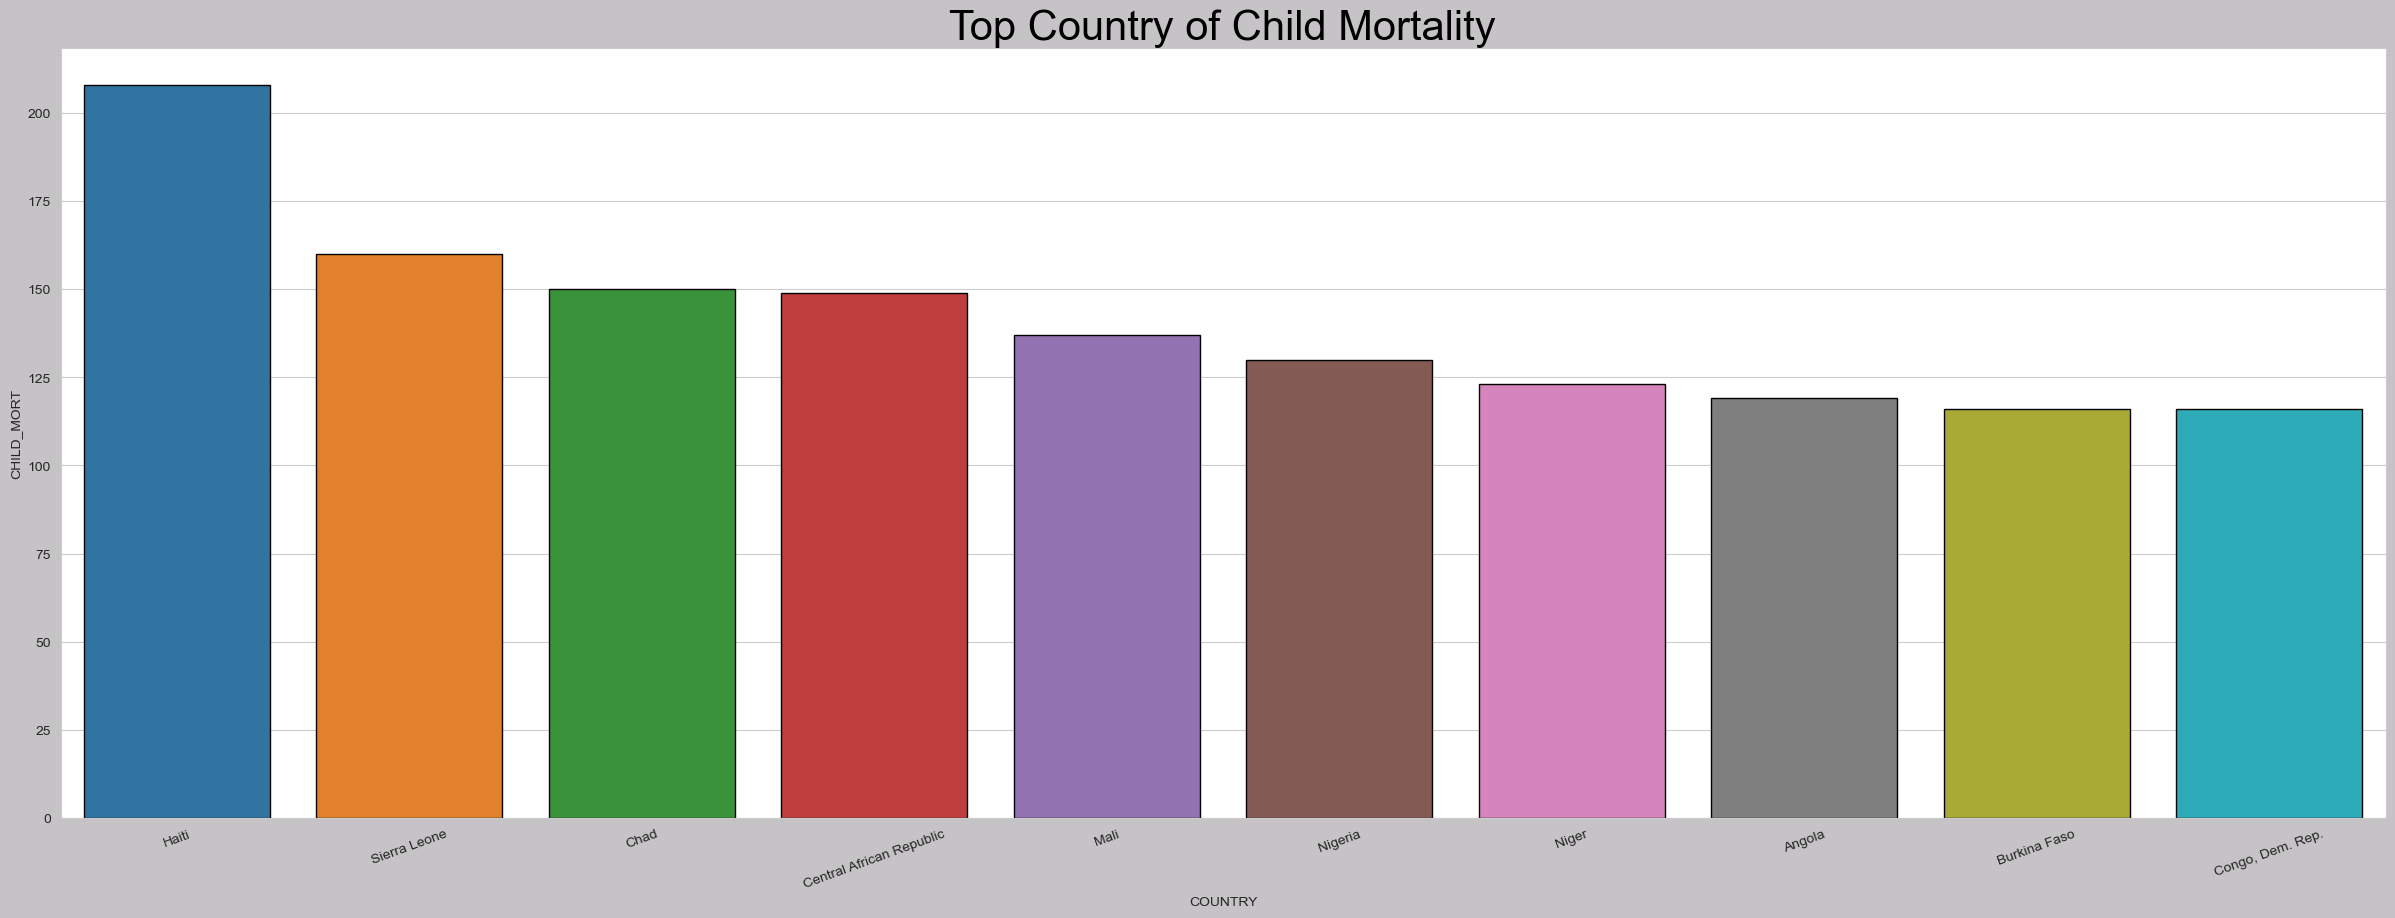

In [15]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='child_mort',data=childmort_top,edgecolor='black')
plt.title(' Top Country of Child Mortality ',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("CHILD_MORT")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [16]:
#bottom 10 countries of child_mort

childmort_bottom=df.sort_values("child_mort",ascending=True).head(10)


In [17]:
childmort_bottom

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800


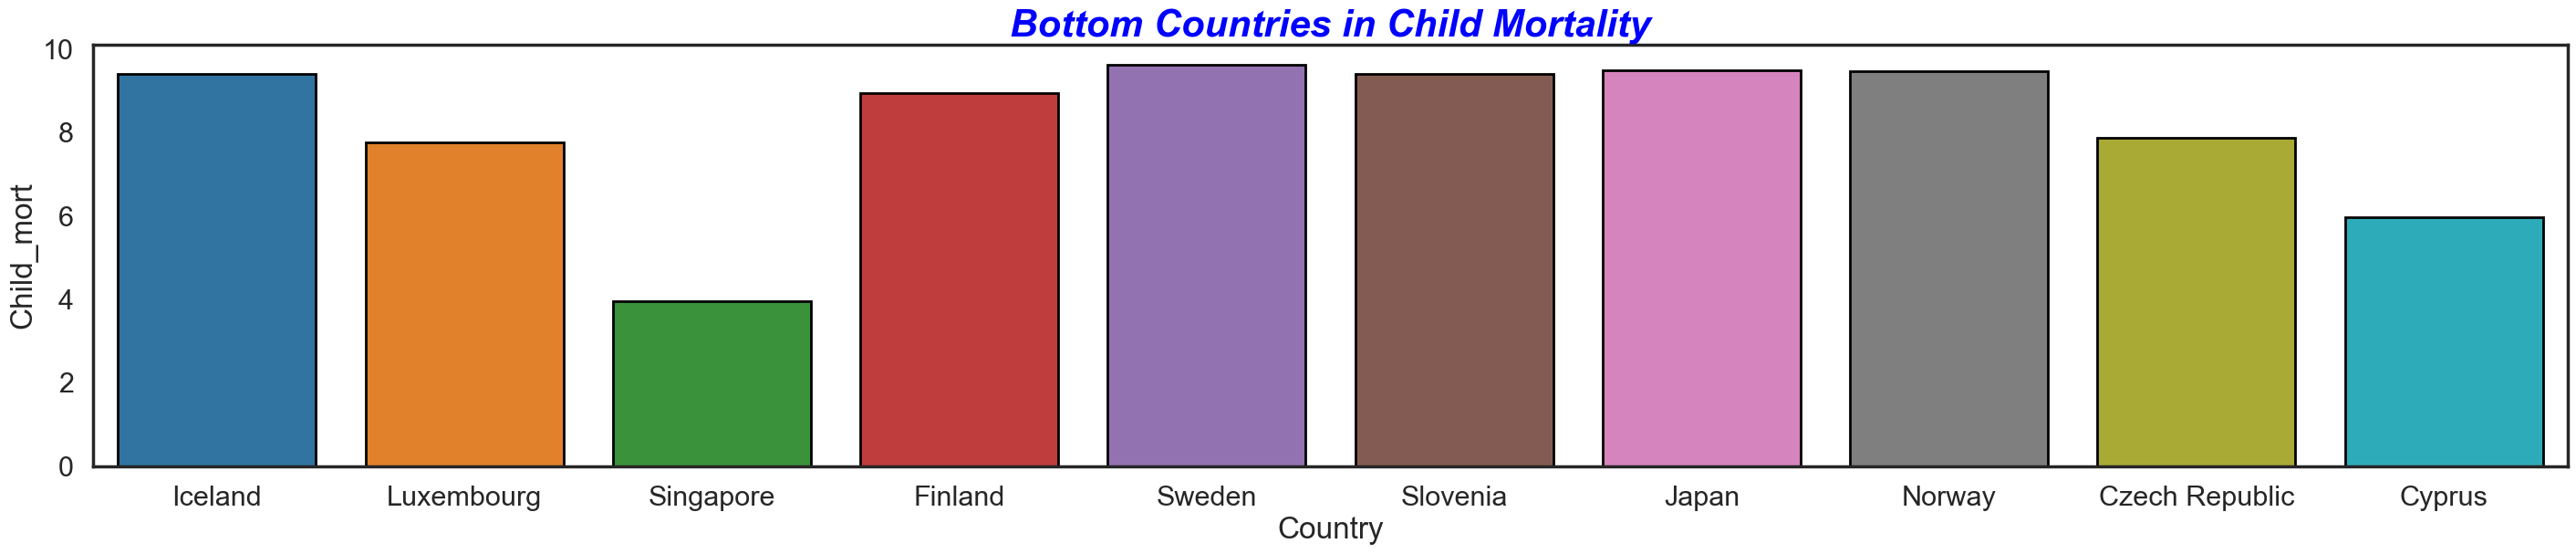

In [18]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='health',data=childmort_bottom,edgecolor='black')
plt.title('Bottom Countries in Child Mortality',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('Child_mort')

plt.show()

In [19]:
# top 10 countries of exports
export_top=df.sort_values('exports',ascending=False).head(10)
export_top

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000


[Text(0, 0, 'Haiti'),
 Text(1, 0, 'Sierra Leone'),
 Text(2, 0, 'Chad'),
 Text(3, 0, 'Central African Republic'),
 Text(4, 0, 'Mali'),
 Text(5, 0, 'Nigeria'),
 Text(6, 0, 'Niger'),
 Text(7, 0, 'Angola'),
 Text(8, 0, 'Burkina Faso'),
 Text(9, 0, 'Congo, Dem. Rep.')]

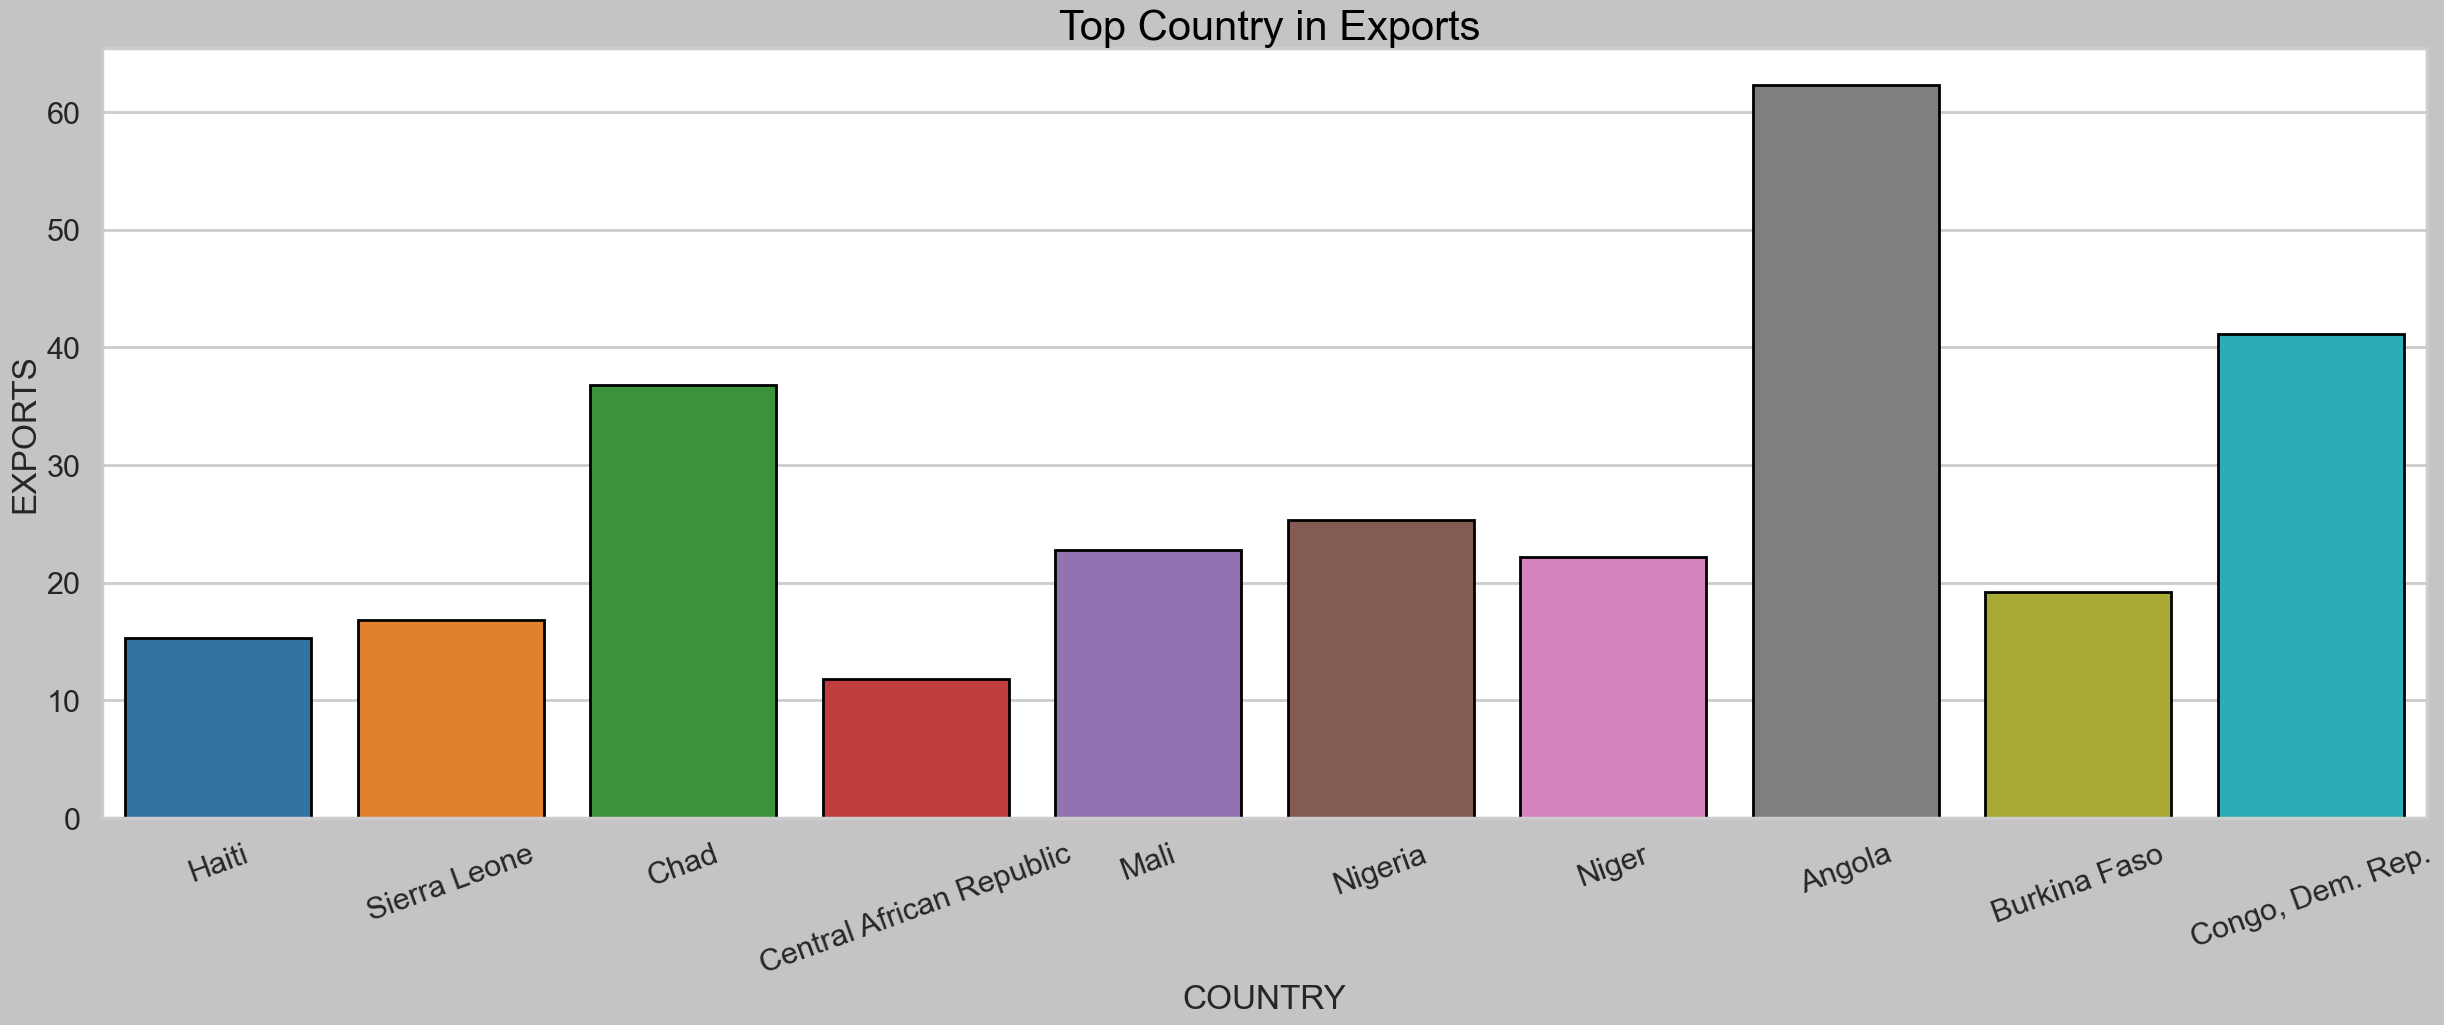

In [20]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='exports',data=childmort_top,edgecolor='black')
plt.title(' Top Country in Exports',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("EXPORTS")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [21]:
#bottom countries of exports
ex_bottom=df.sort_values('exports',ascending=True).head(10)
ex_bottom

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.50,71.1,6.23,3600
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
26,Burundi,93.6,8.920,11.60,39.2000,764,12.30,57.7,6.26,231
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.44,56.2,5.82,553
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.01,47.5,5.21,446
126,Rwanda,63.6,12.000,10.50,30.0000,1350,2.61,64.6,4.51,563
151,Tonga,17.4,12.400,5.07,60.3000,4980,3.68,69.9,3.91,3550


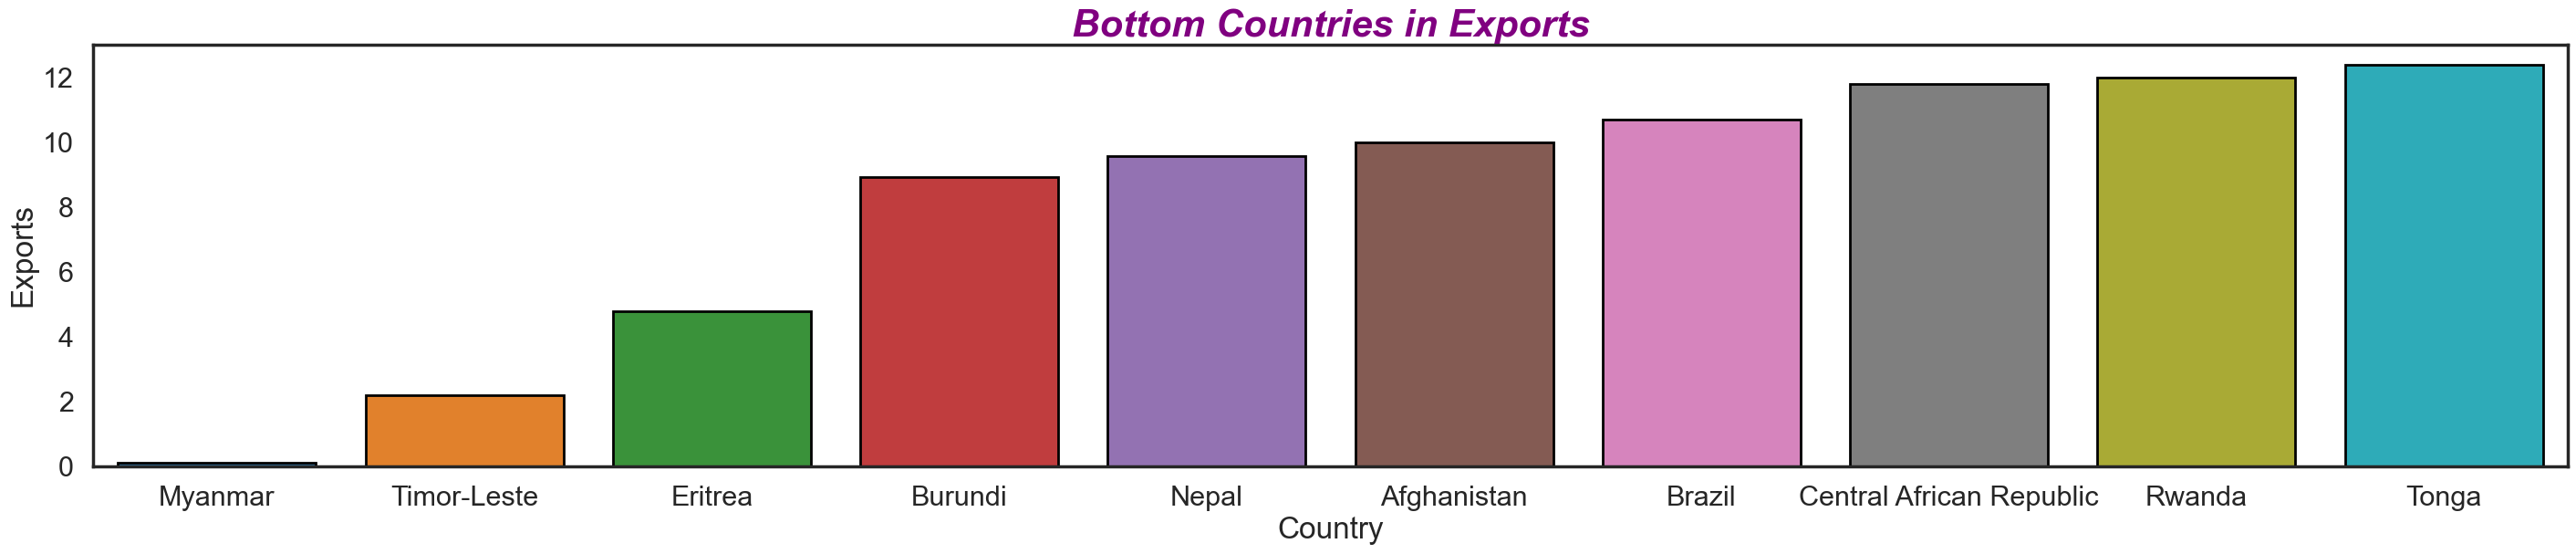

In [22]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='exports',data=ex_bottom,edgecolor='black')
plt.title('Bottom Countries in Exports',fontsize=30,fontweight='bold',fontstyle='italic',color="purple")
plt.xlabel('Country')
plt.ylabel('Exports')

plt.show()

In [23]:
# top countries in health
health=df.sort_values('health',ascending=False).head(10)
health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.40,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.50,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.80,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.00,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.80,11.9,28.1,36900,1.050,81.4,2.03,40600
88,Liberia,89.3,19.10,11.8,92.6,700,5.470,60.8,5.02,327
102,Moldova,17.2,39.20,11.7,78.5,3910,11.100,69.7,1.27,1630
58,Germany,4.2,42.30,11.6,37.1,40400,0.758,80.1,1.39,41800
26,Burundi,93.6,8.92,11.6,39.2,764,12.300,57.7,6.26,231
145,Switzerland,4.5,64.00,11.5,53.3,55500,0.317,82.2,1.52,74600


[Text(0, 0, 'United States'),
 Text(1, 0, 'Micronesia, Fed. Sts.'),
 Text(2, 0, 'Sierra Leone'),
 Text(3, 0, 'Netherlands'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Liberia'),
 Text(6, 0, 'Moldova'),
 Text(7, 0, 'Germany'),
 Text(8, 0, 'Burundi'),
 Text(9, 0, 'Switzerland')]

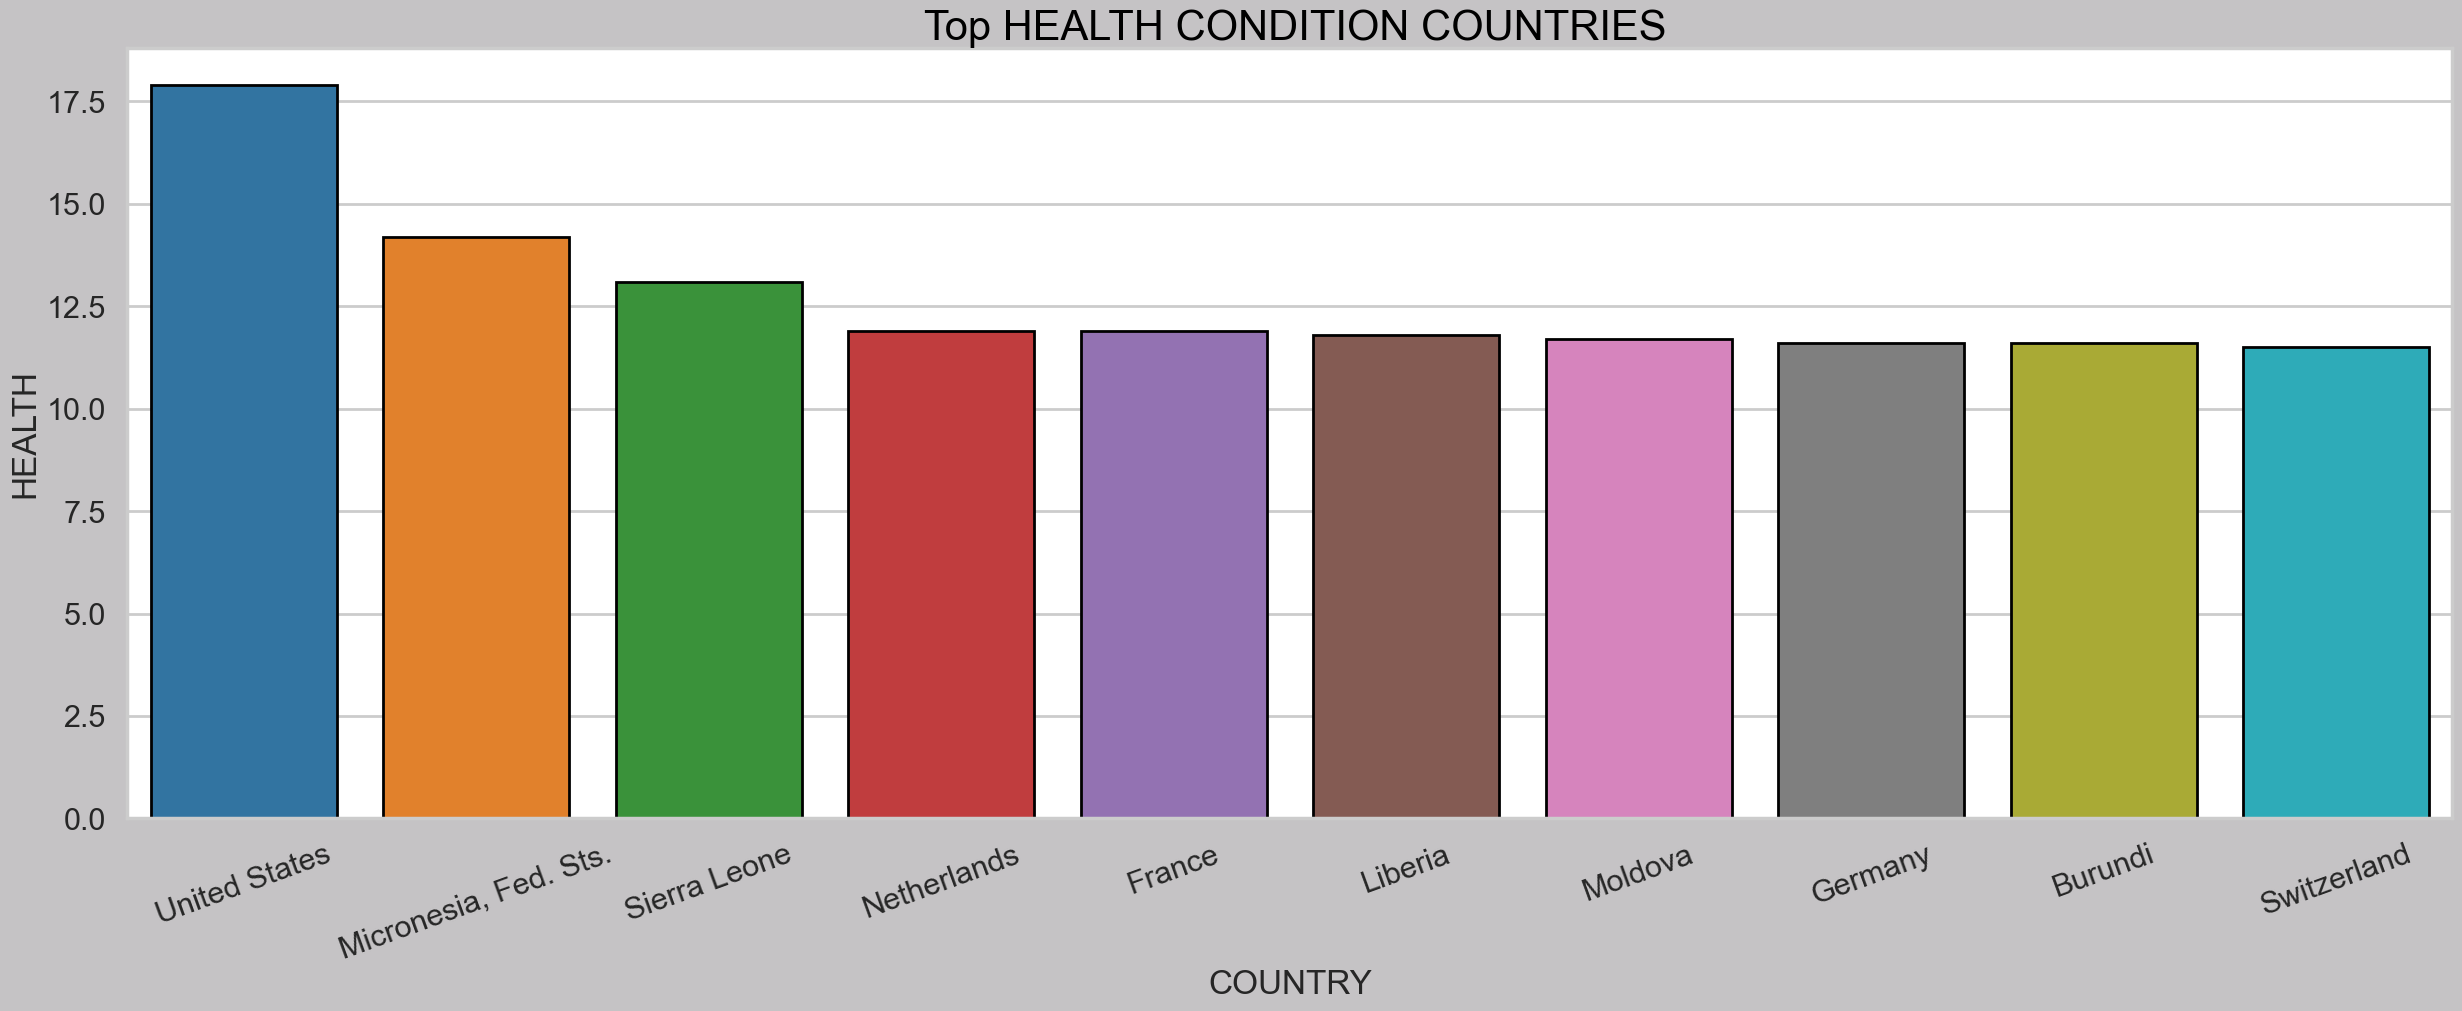

In [24]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='health',data=health,edgecolor='black')
plt.title(' Top HEALTH CONDITION COUNTRIES',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("HEALTH")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [25]:
#bottom wise health condition in countries
health_bo=df.sort_values('health',ascending=True).head(10)
health_bo

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
82,Kuwait,10.8,66.700,2.63,30.4000,75200,11.20,78.2,2.21,38500
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.70,77.1,1.84,35300


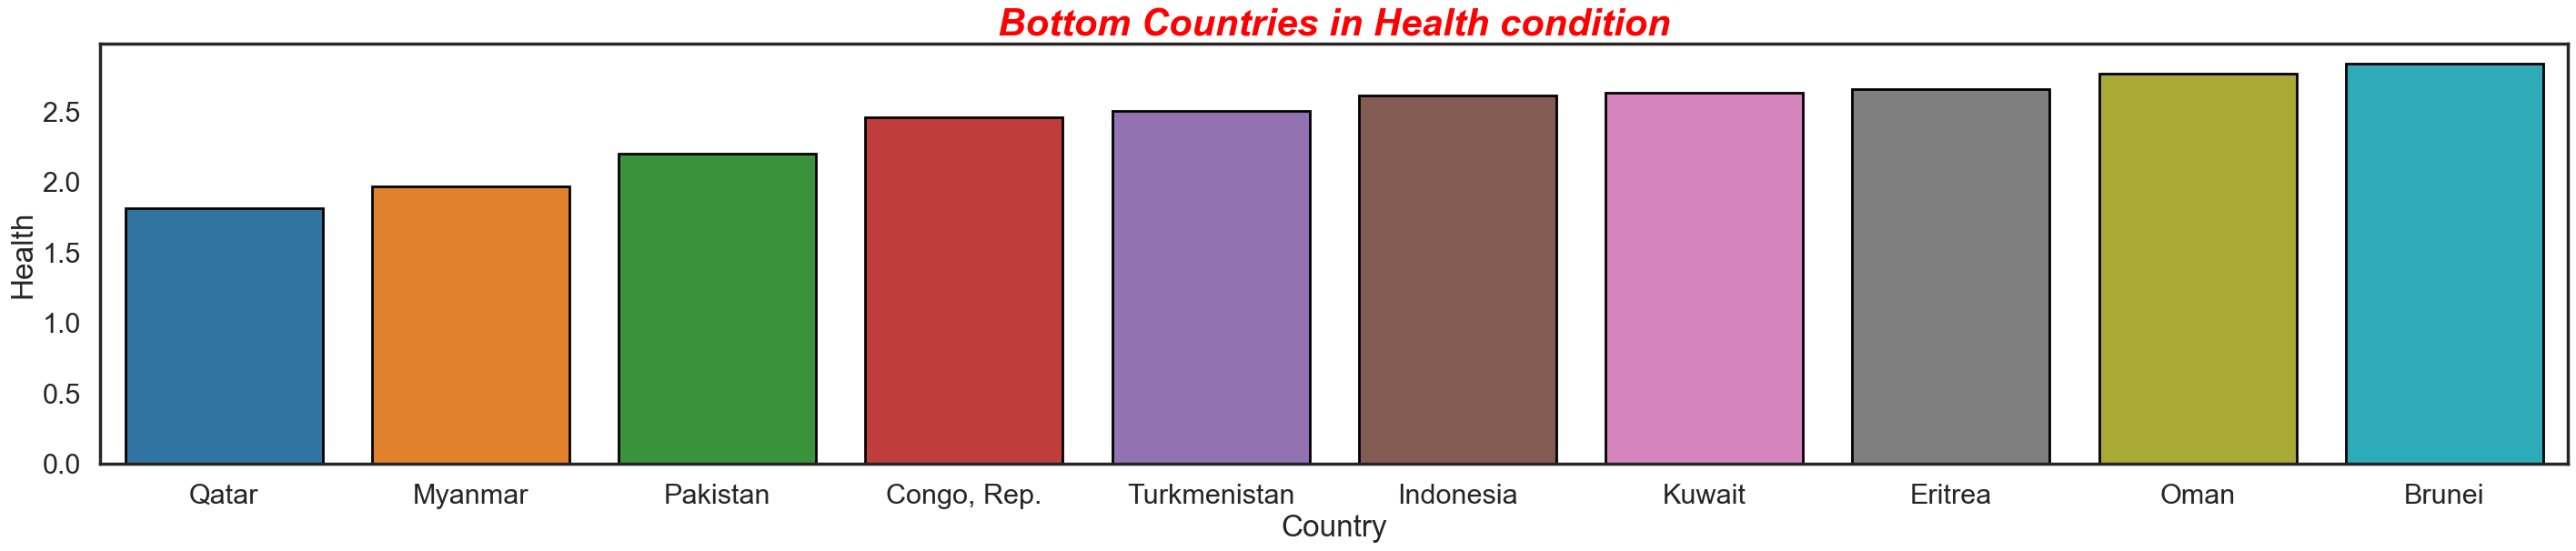

In [26]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='health',data=health_bo,edgecolor='black')
plt.title('Bottom Countries in Health condition',fontsize=30,fontweight='bold',fontstyle='oblique',color='red')
plt.xlabel('Country')
plt.ylabel('Health')

plt.show()

In [27]:
# top countries in imports
imports=df.sort_values('imports',ascending=False).head(10)
imports

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
88,Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.000,68.5,3.10,880
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860


[Text(0, 0, 'Singapore'),
 Text(1, 0, 'Malta'),
 Text(2, 0, 'Luxembourg'),
 Text(3, 0, 'Seychelles'),
 Text(4, 0, 'Lesotho'),
 Text(5, 0, 'Liberia'),
 Text(6, 0, 'Ireland'),
 Text(7, 0, 'Kyrgyz Republic'),
 Text(8, 0, 'Solomon Islands'),
 Text(9, 0, 'Micronesia, Fed. Sts.')]

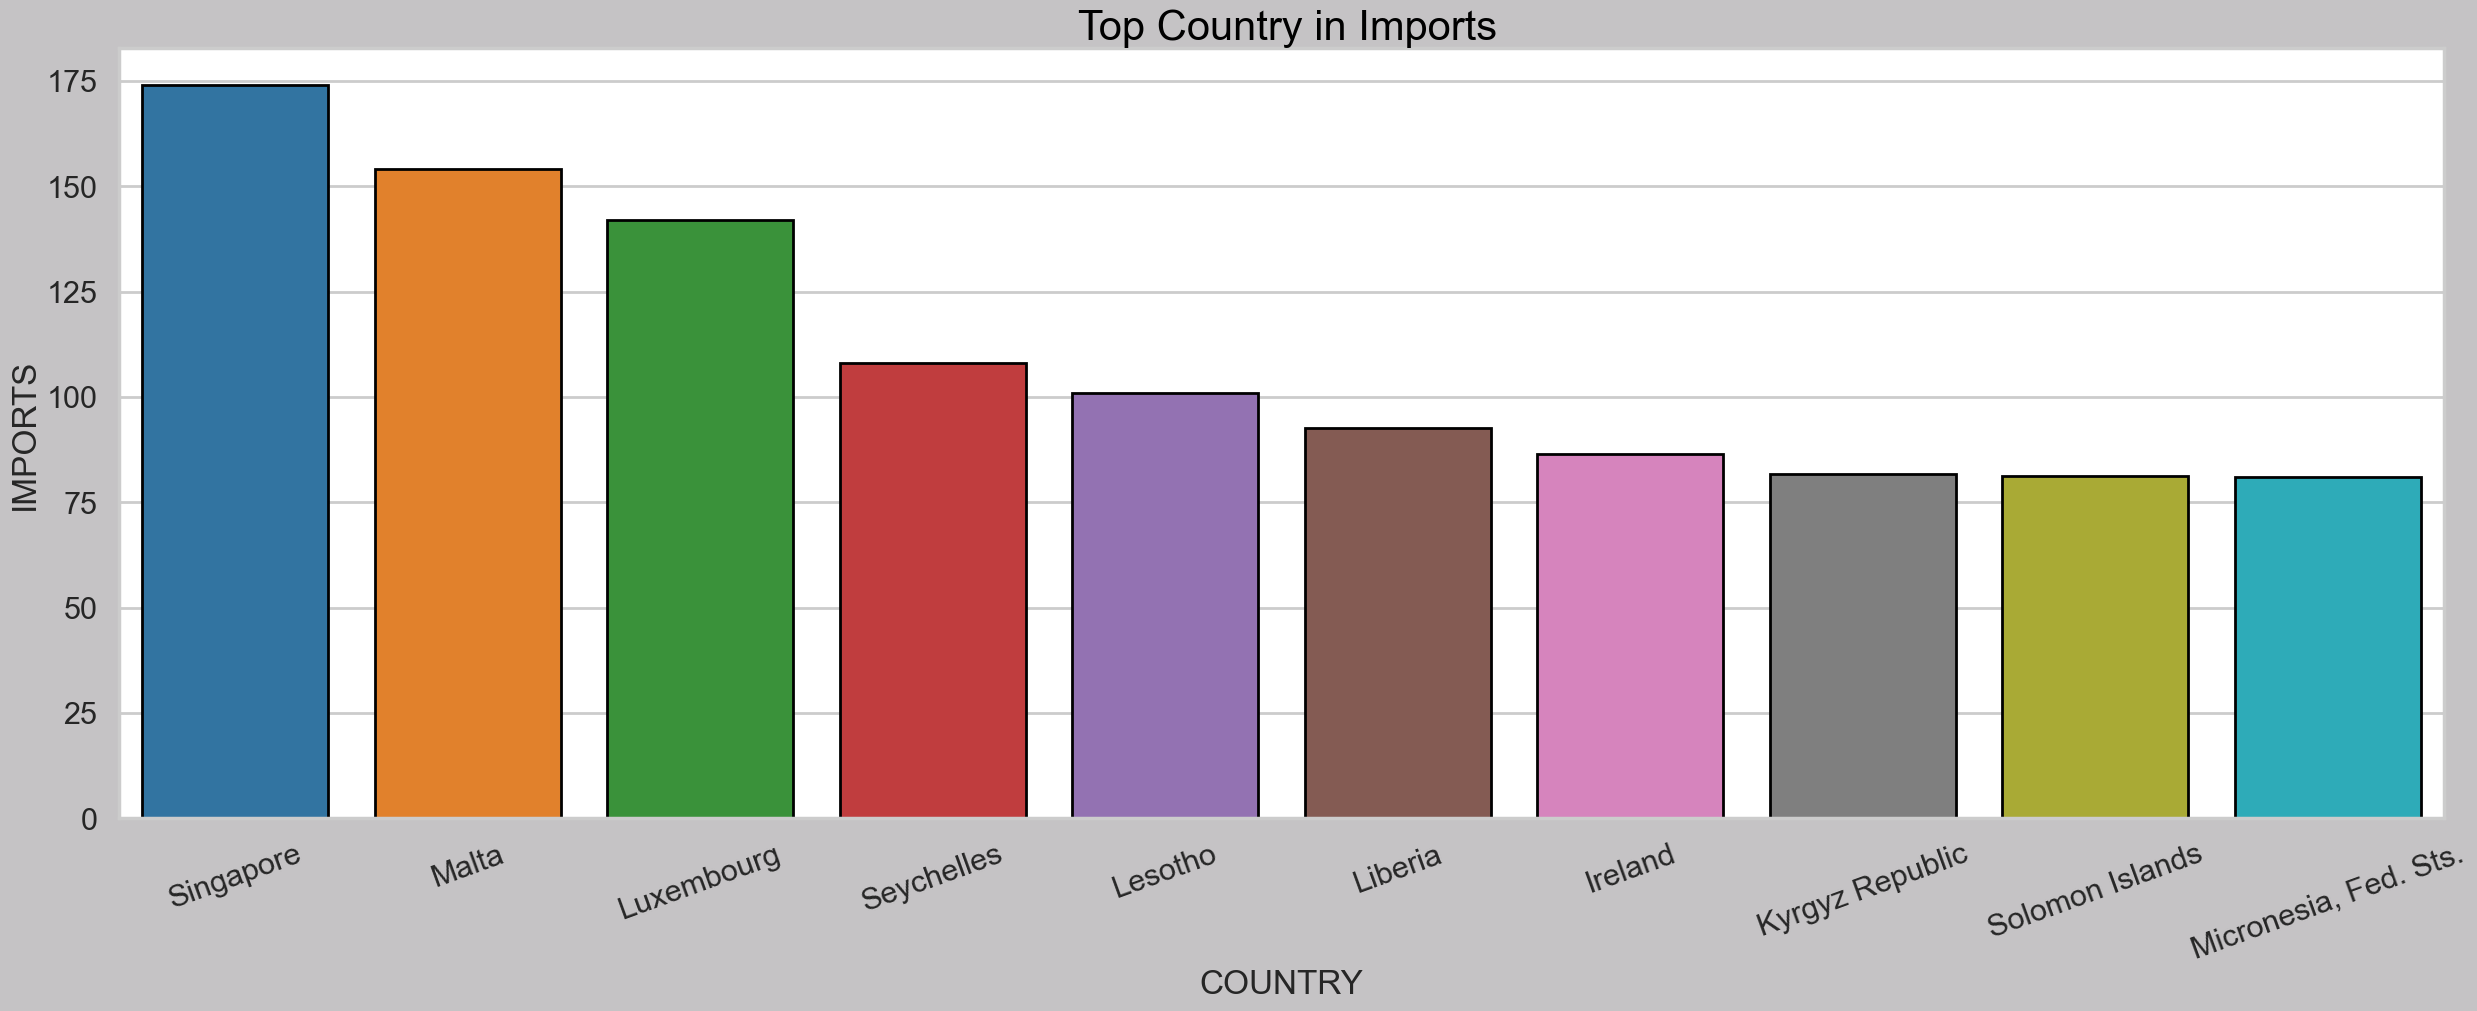

In [28]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='imports',data=imports,edgecolor='black')
plt.title(' Top Country in Imports',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("IMPORTS")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [29]:
# bottom wise imports in countries
imports_b=df.sort_values('imports',ascending=True).head(10)
imports_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
77,Japan,3.2,15.000,9.49,13.6000,35800,-1.90,82.8,1.39,44500
159,United States,7.3,12.400,17.90,15.8000,49400,1.22,78.7,1.93,48400
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300
142,Sudan,76.7,19.700,6.32,17.2000,3370,19.60,66.3,4.88,1480
113,Nigeria,130.0,25.300,5.07,17.4000,5150,104.00,60.5,5.84,2330
163,Venezuela,17.1,28.500,4.91,17.6000,16500,45.90,75.4,2.47,13500
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.86,76.4,2.01,6250
55,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750


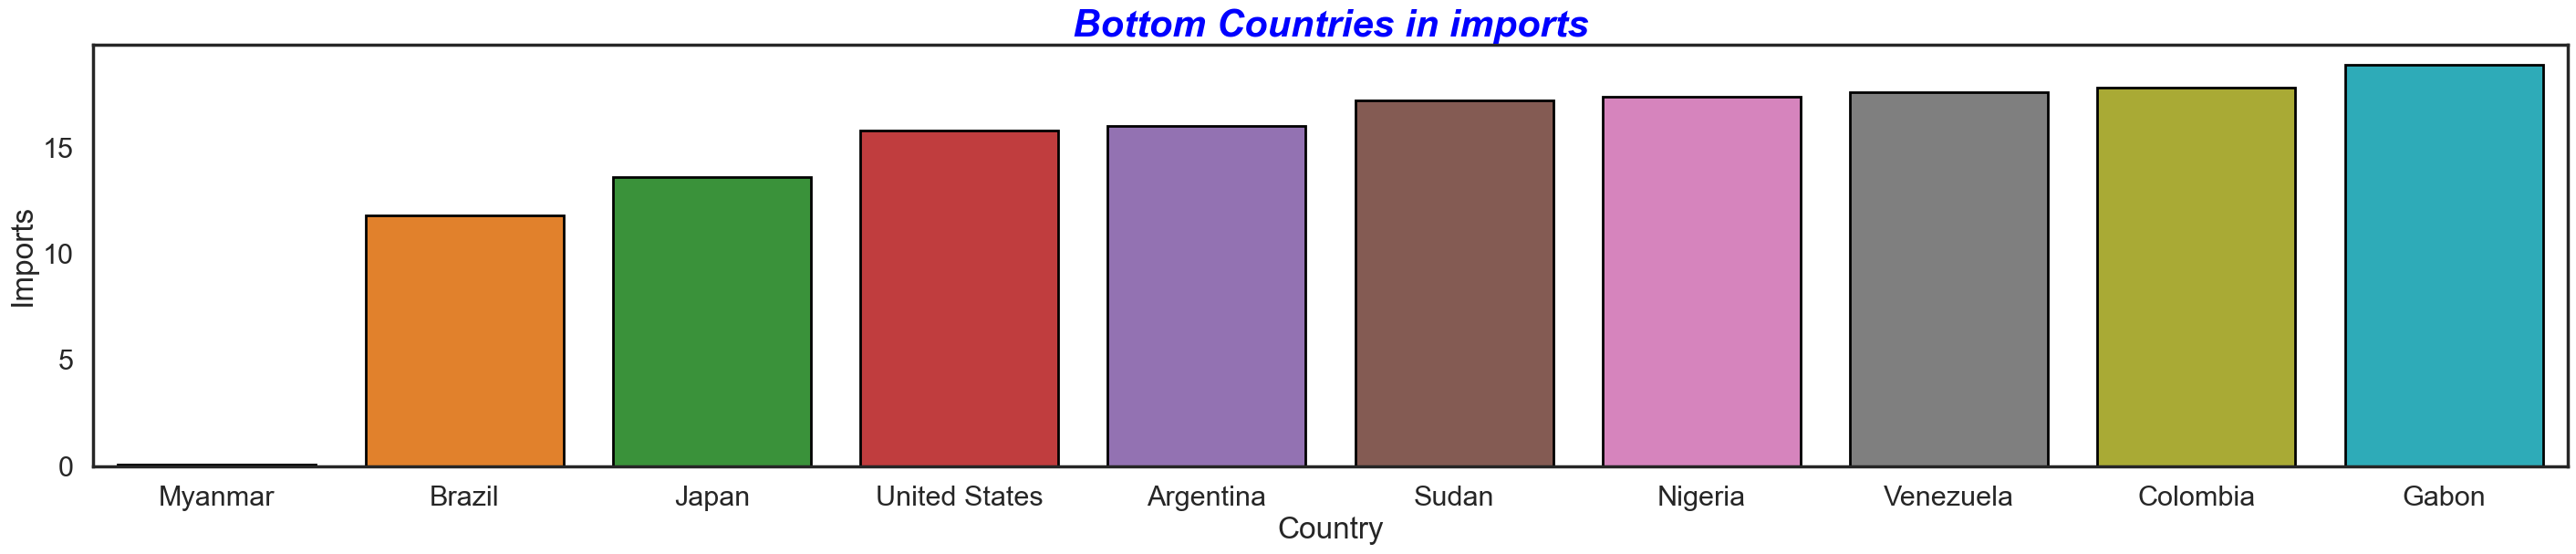

In [30]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='imports',data=imports_b,edgecolor='black')
plt.title('Bottom Countries in imports',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('Imports')

plt.show()

In [31]:
# top countries income wise
income=df.sort_values('income',ascending=False).head(10)
income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


[Text(0, 0, 'Qatar'),
 Text(1, 0, 'Luxembourg'),
 Text(2, 0, 'Brunei'),
 Text(3, 0, 'Kuwait'),
 Text(4, 0, 'Singapore'),
 Text(5, 0, 'Norway'),
 Text(6, 0, 'United Arab Emirates'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'United States'),
 Text(9, 0, 'Ireland')]

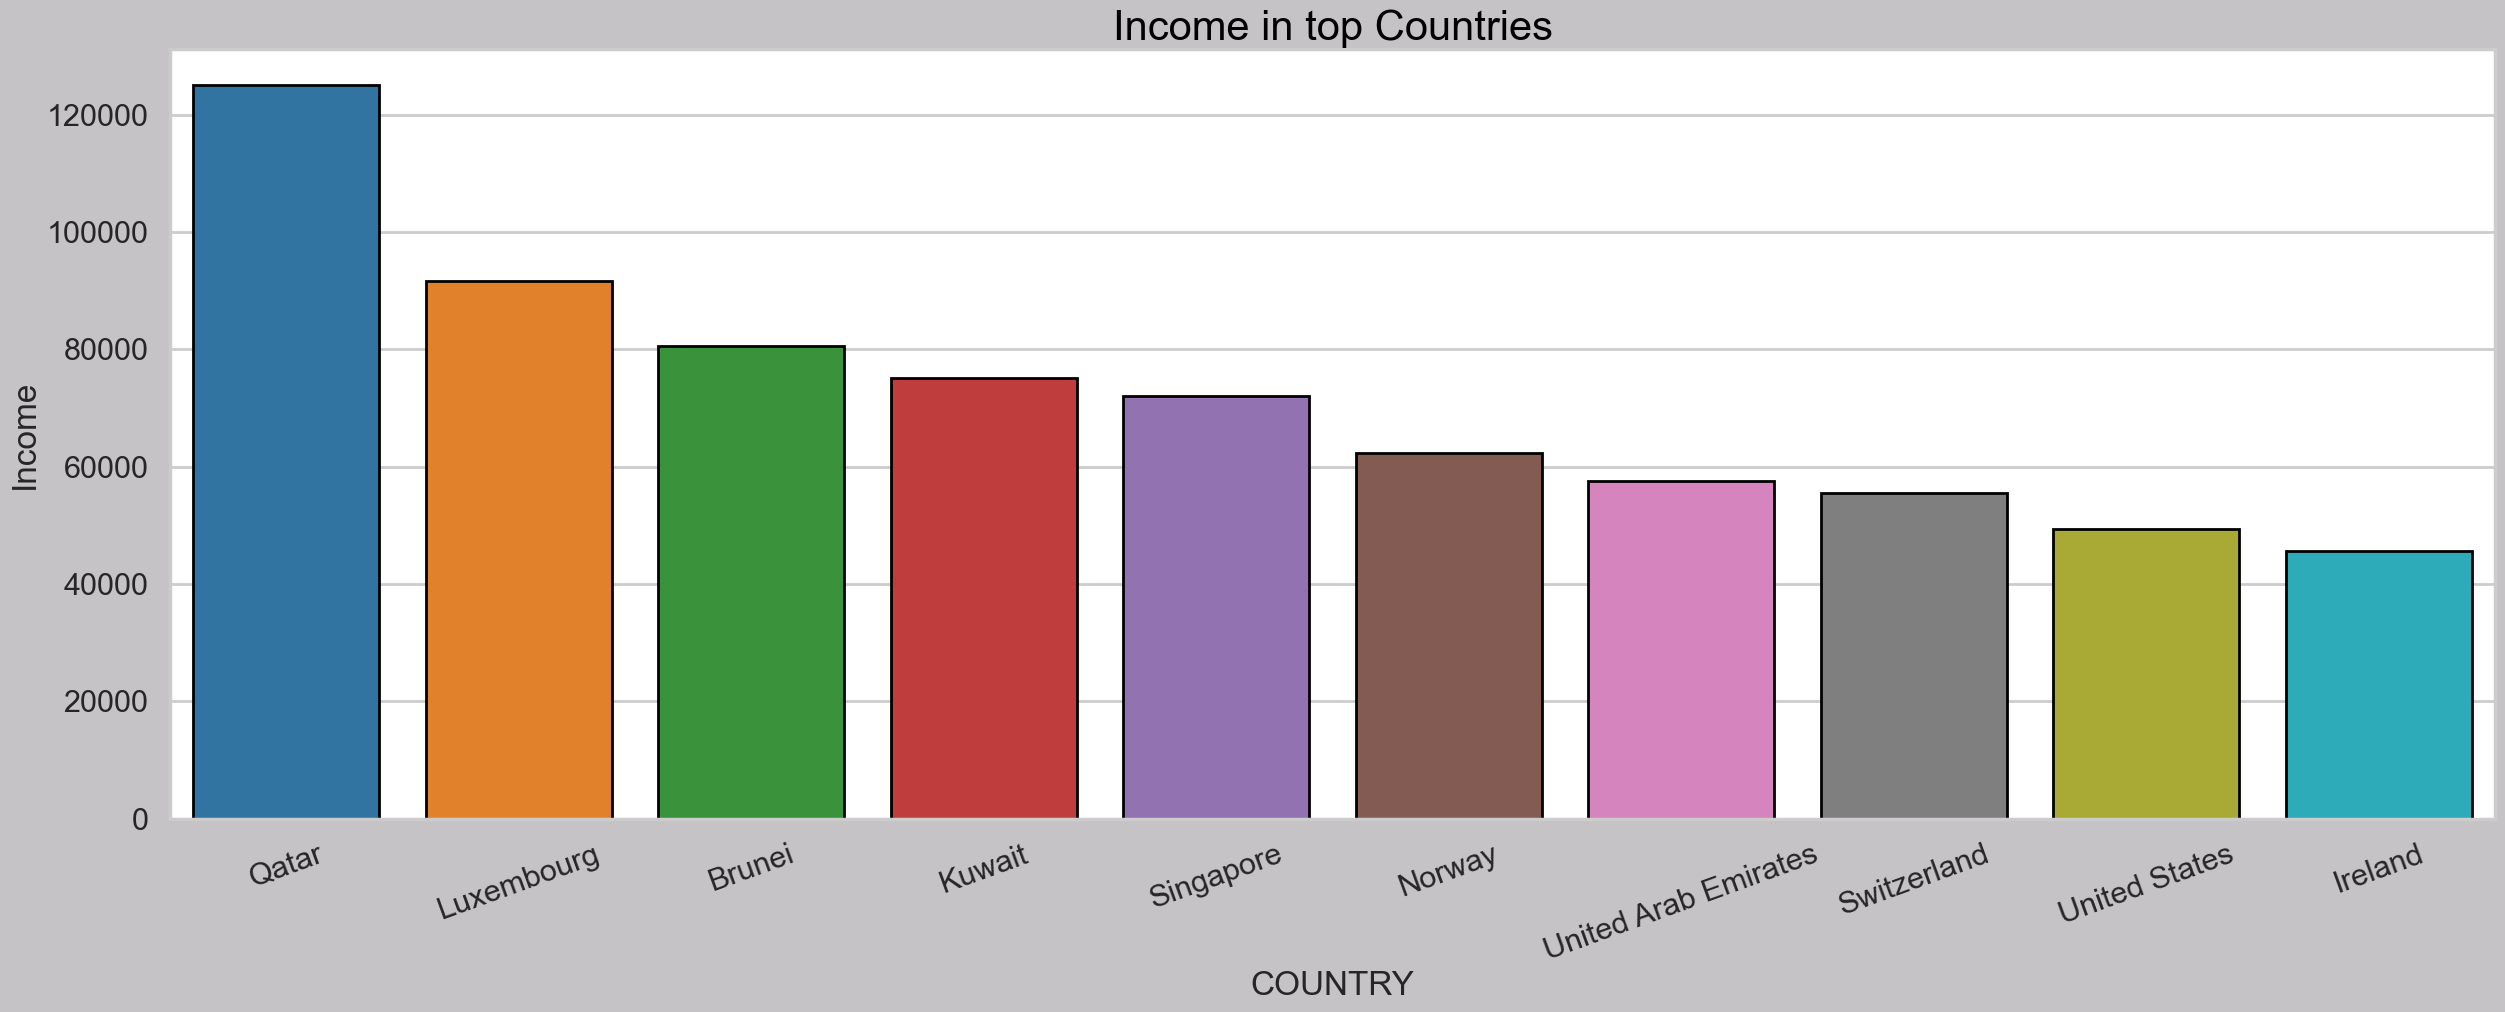

In [32]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='income',data=income,edgecolor='black')
plt.title('Income in top Countries',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("Income")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [33]:
# bottom wise income in countries
income_b=df.sort_values('income',ascending=True).head(10)
income_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


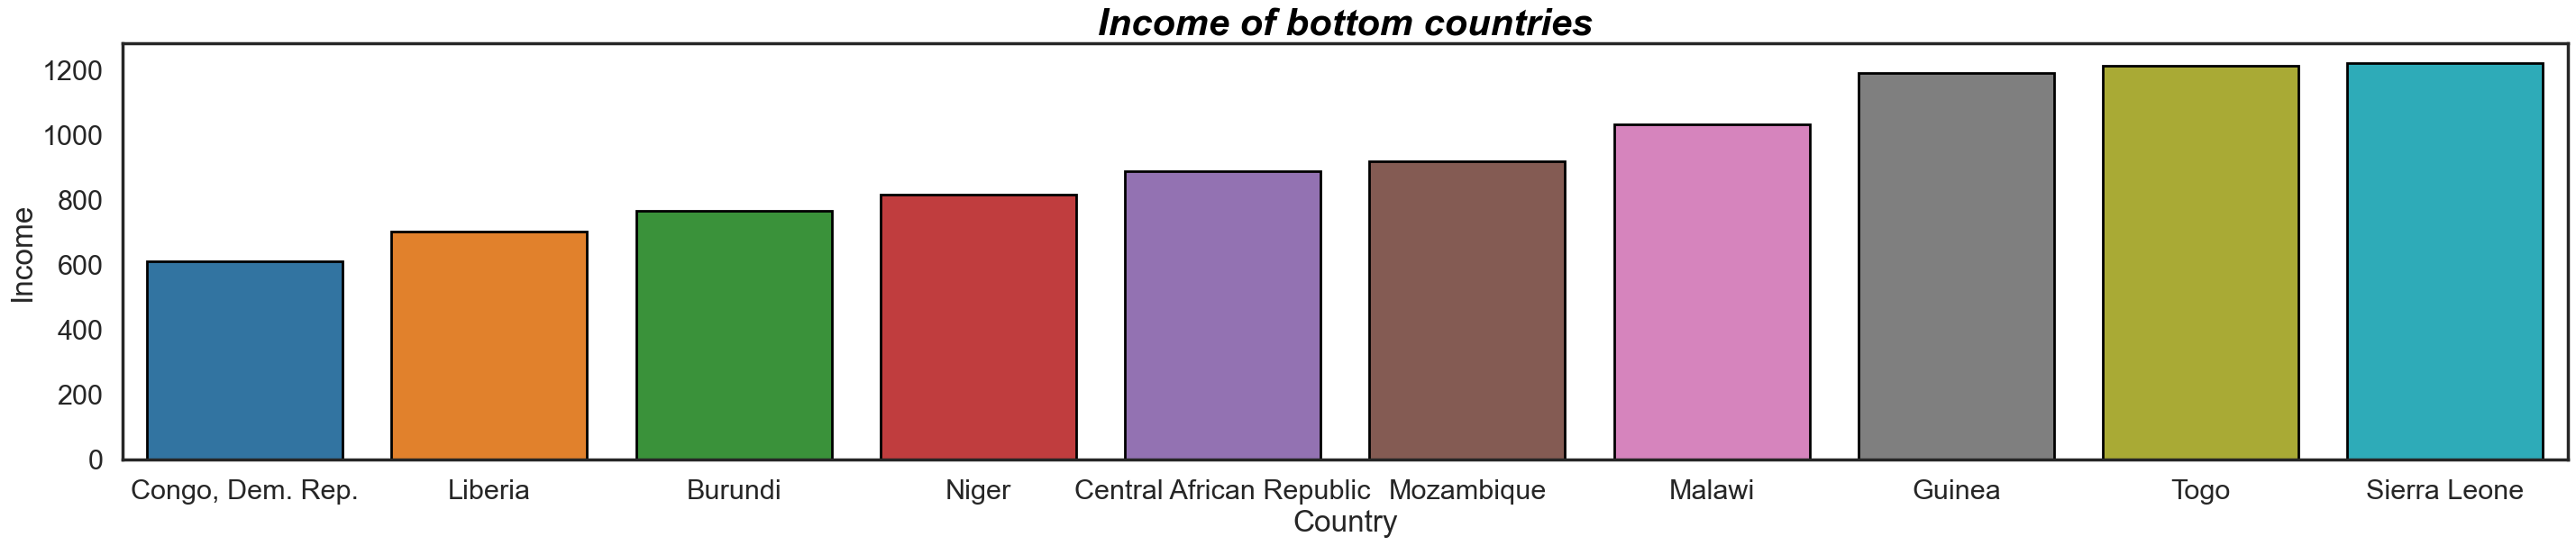

In [34]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='income',data=income_b,edgecolor='black')
plt.title(' Income of bottom countries ',fontsize=30,fontweight='bold',fontstyle='oblique',color='black')
plt.xlabel('Country')
plt.ylabel('Income')

plt.show()

In [35]:
# top countries in inflation wise
inflation=df.sort_values('inflation',ascending=False).head(10)
inflation

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.20,2810
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334


[Text(0, 0, 'Nigeria'),
 Text(1, 0, 'Venezuela'),
 Text(2, 0, 'Mongolia'),
 Text(3, 0, 'Timor-Leste'),
 Text(4, 0, 'Equatorial Guinea'),
 Text(5, 0, 'Yemen'),
 Text(6, 0, 'Sri Lanka'),
 Text(7, 0, 'Angola'),
 Text(8, 0, 'Argentina'),
 Text(9, 0, 'Congo, Dem. Rep.')]

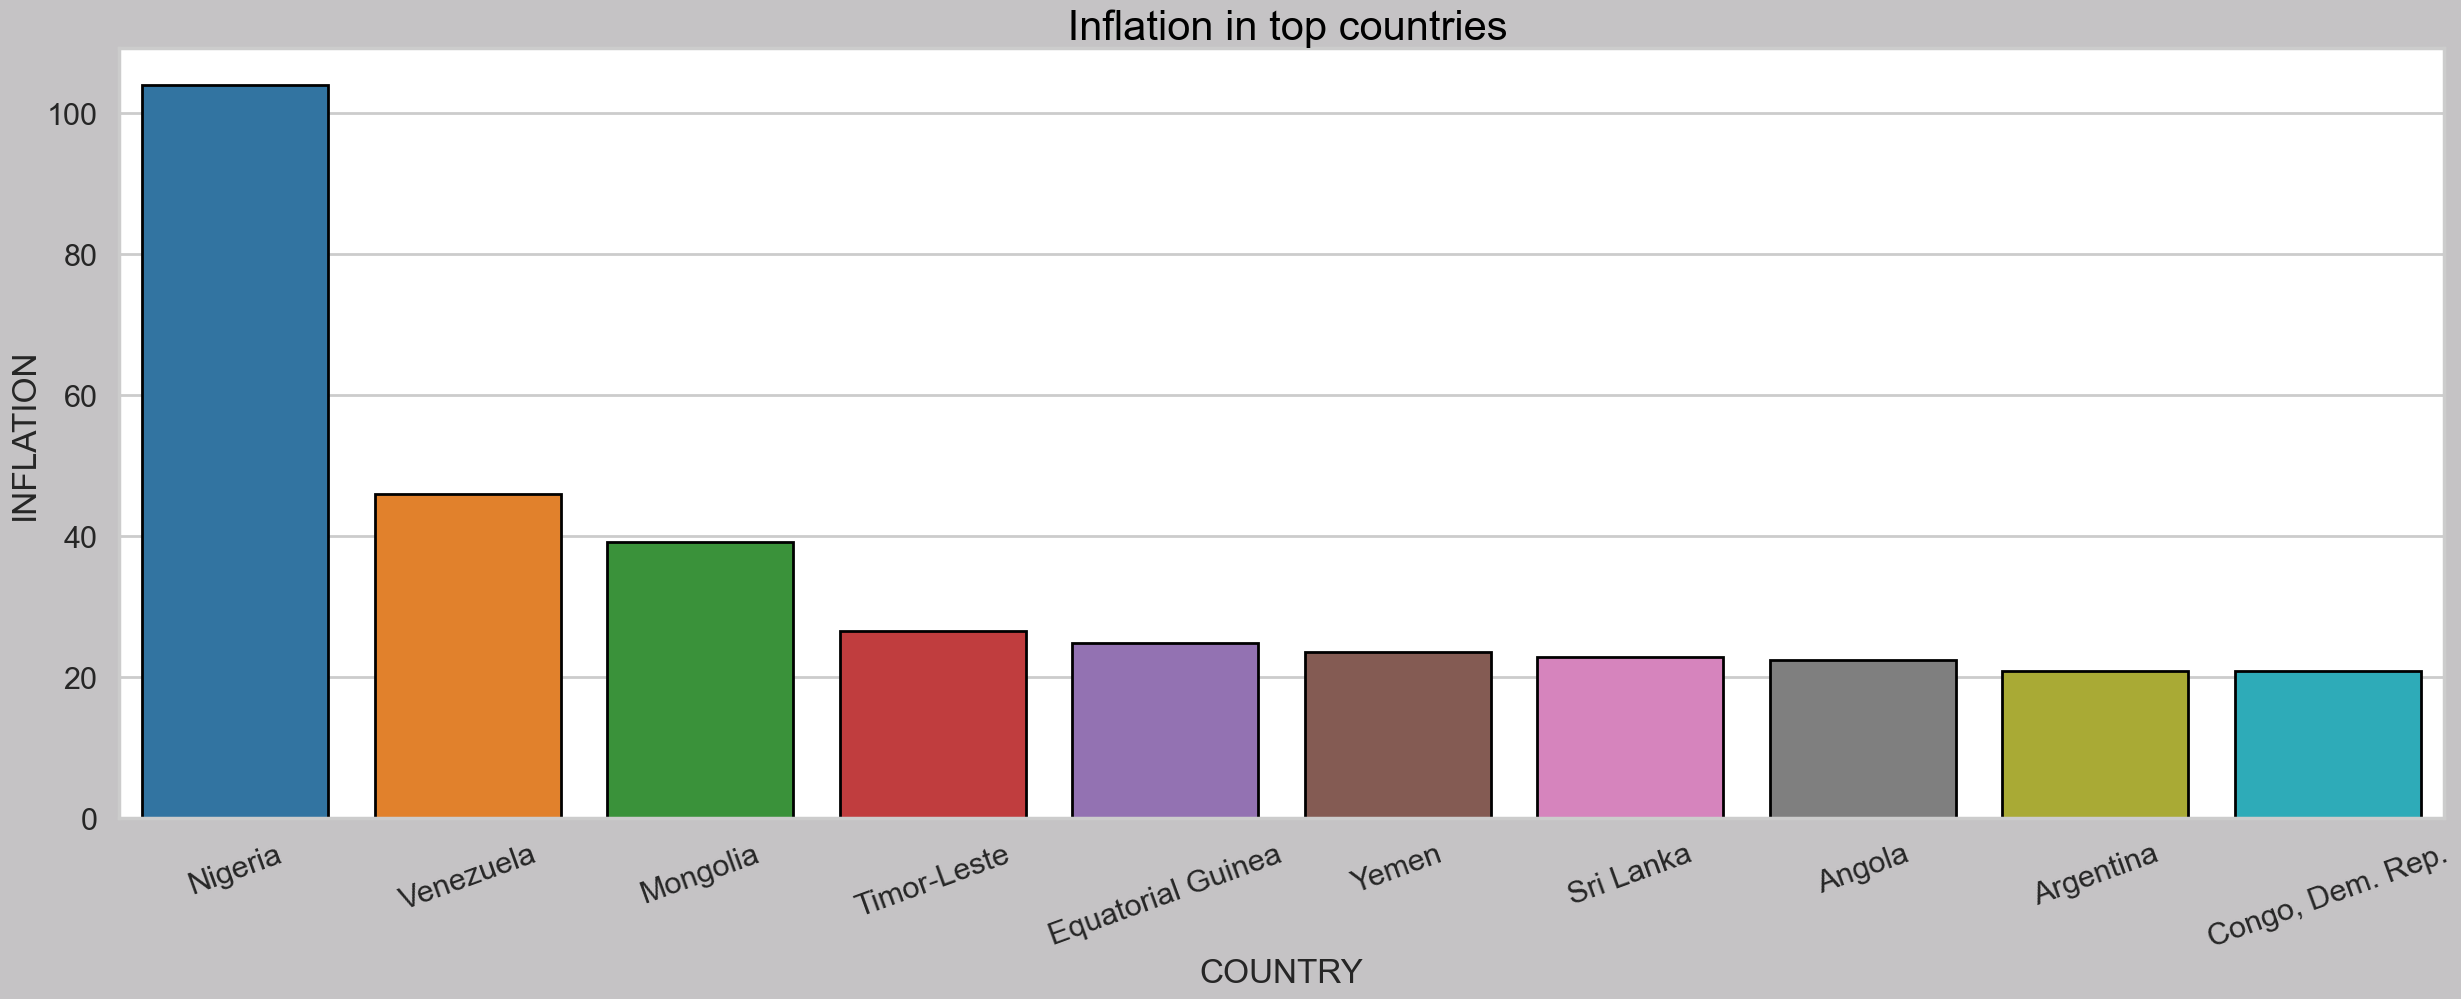

In [36]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='inflation',data=inflation,edgecolor='black')
plt.title(' Inflation in top countries',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("INFLATION")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [37]:
# bottom wise inflation in countries
inflation_b=df.sort_values('income',ascending=True).head(10)
inflation_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


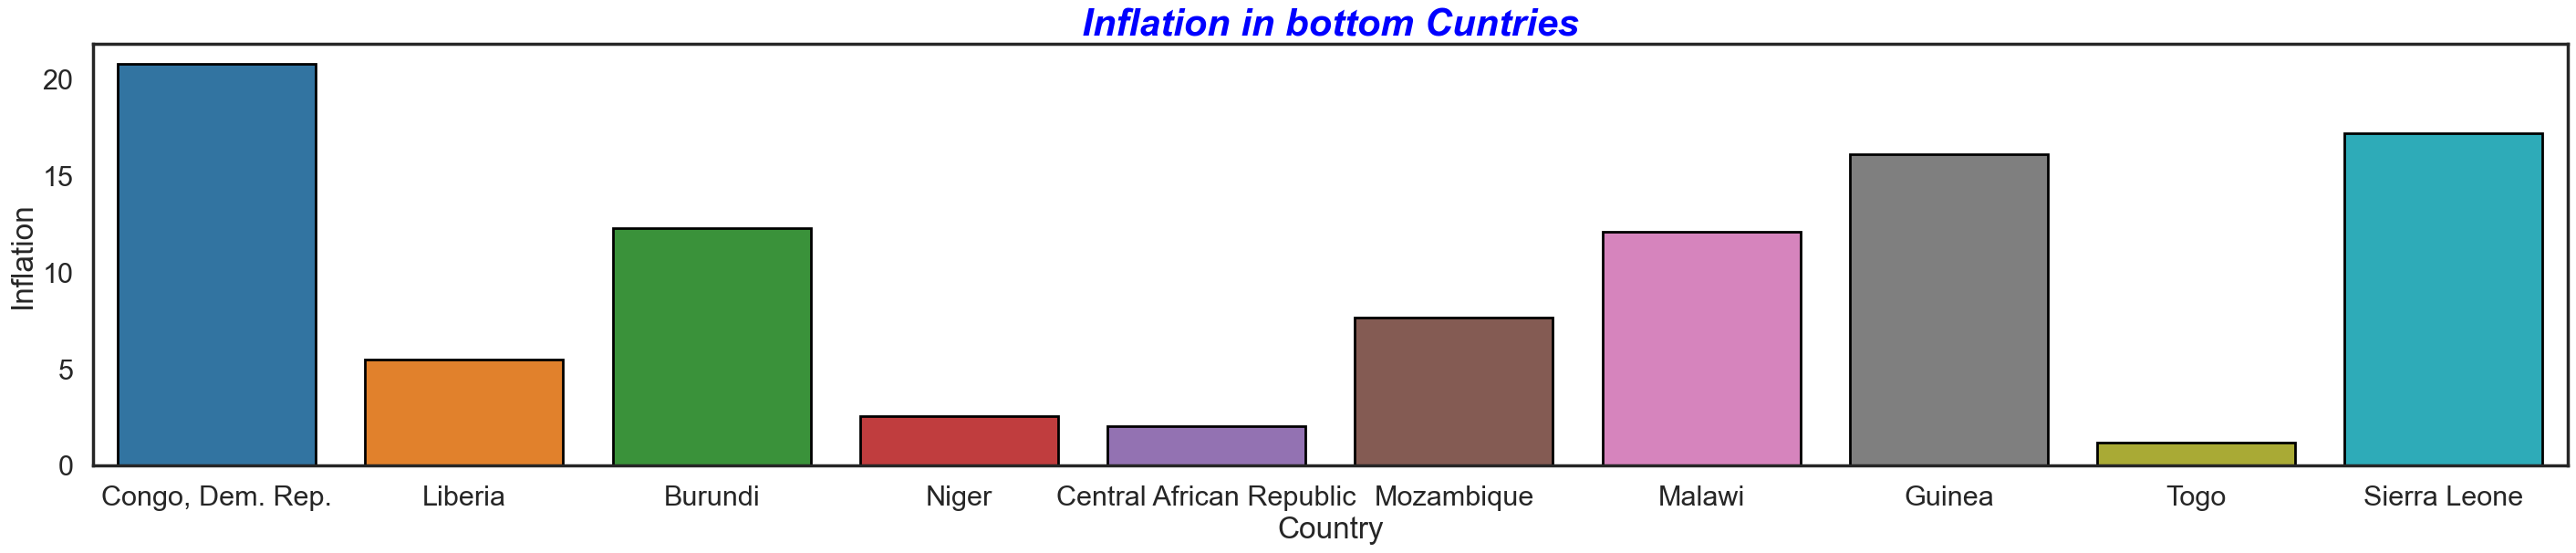

In [38]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='inflation',data=inflation_b,edgecolor='black')
plt.title('Inflation in bottom Cuntries',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('Inflation')

plt.show()

In [39]:
# top countries in life_expec
life_ex=df.sort_values('life_expec',ascending=False).head(10)
life_ex

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600


[Text(0, 0, 'Japan'),
 Text(1, 0, 'Singapore'),
 Text(2, 0, 'Switzerland'),
 Text(3, 0, 'Iceland'),
 Text(4, 0, 'Australia'),
 Text(5, 0, 'Spain'),
 Text(6, 0, 'Italy'),
 Text(7, 0, 'Sweden'),
 Text(8, 0, 'Israel'),
 Text(9, 0, 'France')]

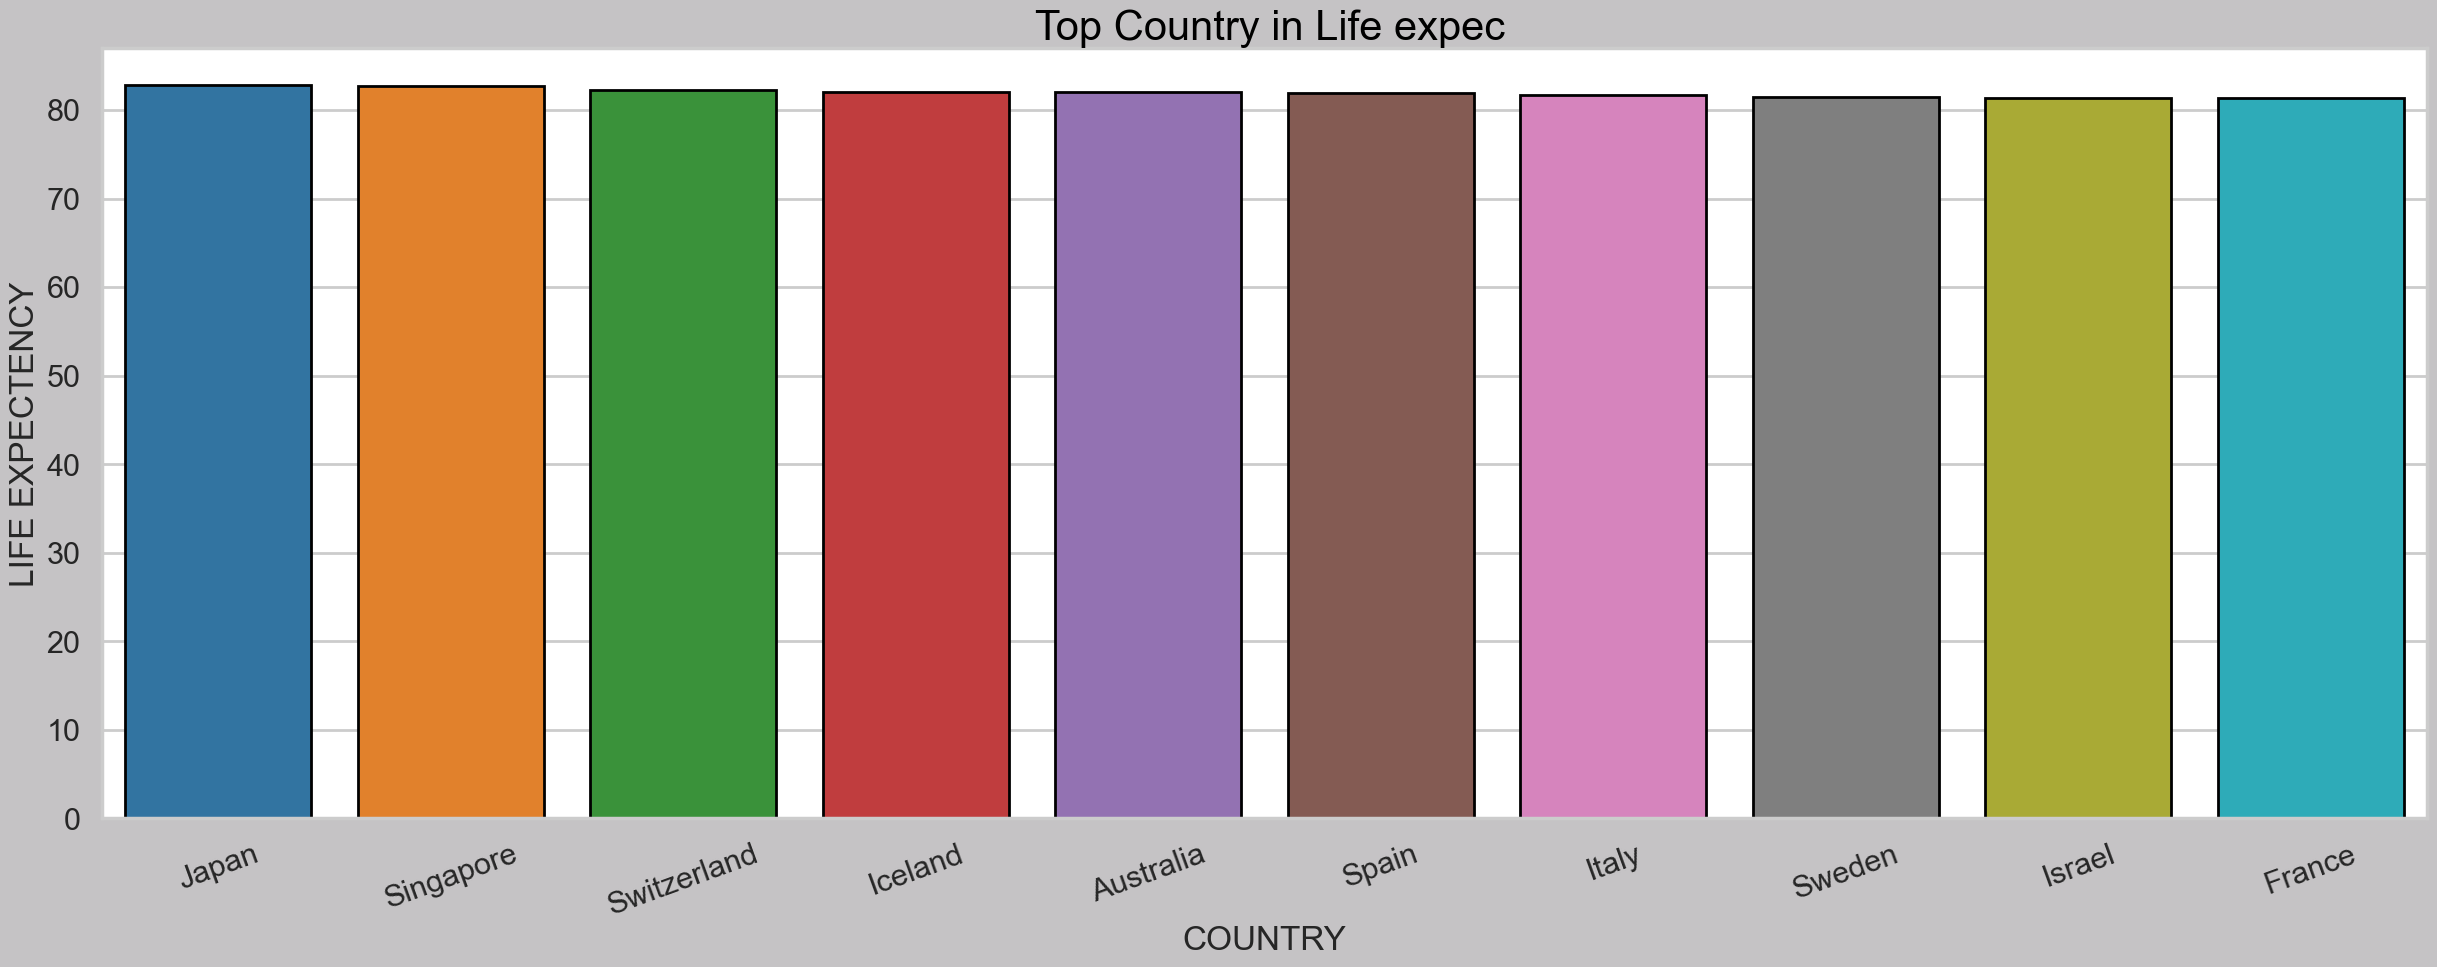

In [40]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='life_expec',data=life_ex,edgecolor='black')
plt.title(' Top Country in Life expec',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("LIFE EXPECTENCY")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [41]:
# bottom wise life_expec of countries
life_b=df.sort_values('life_expec',ascending=True).head(10)
life_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


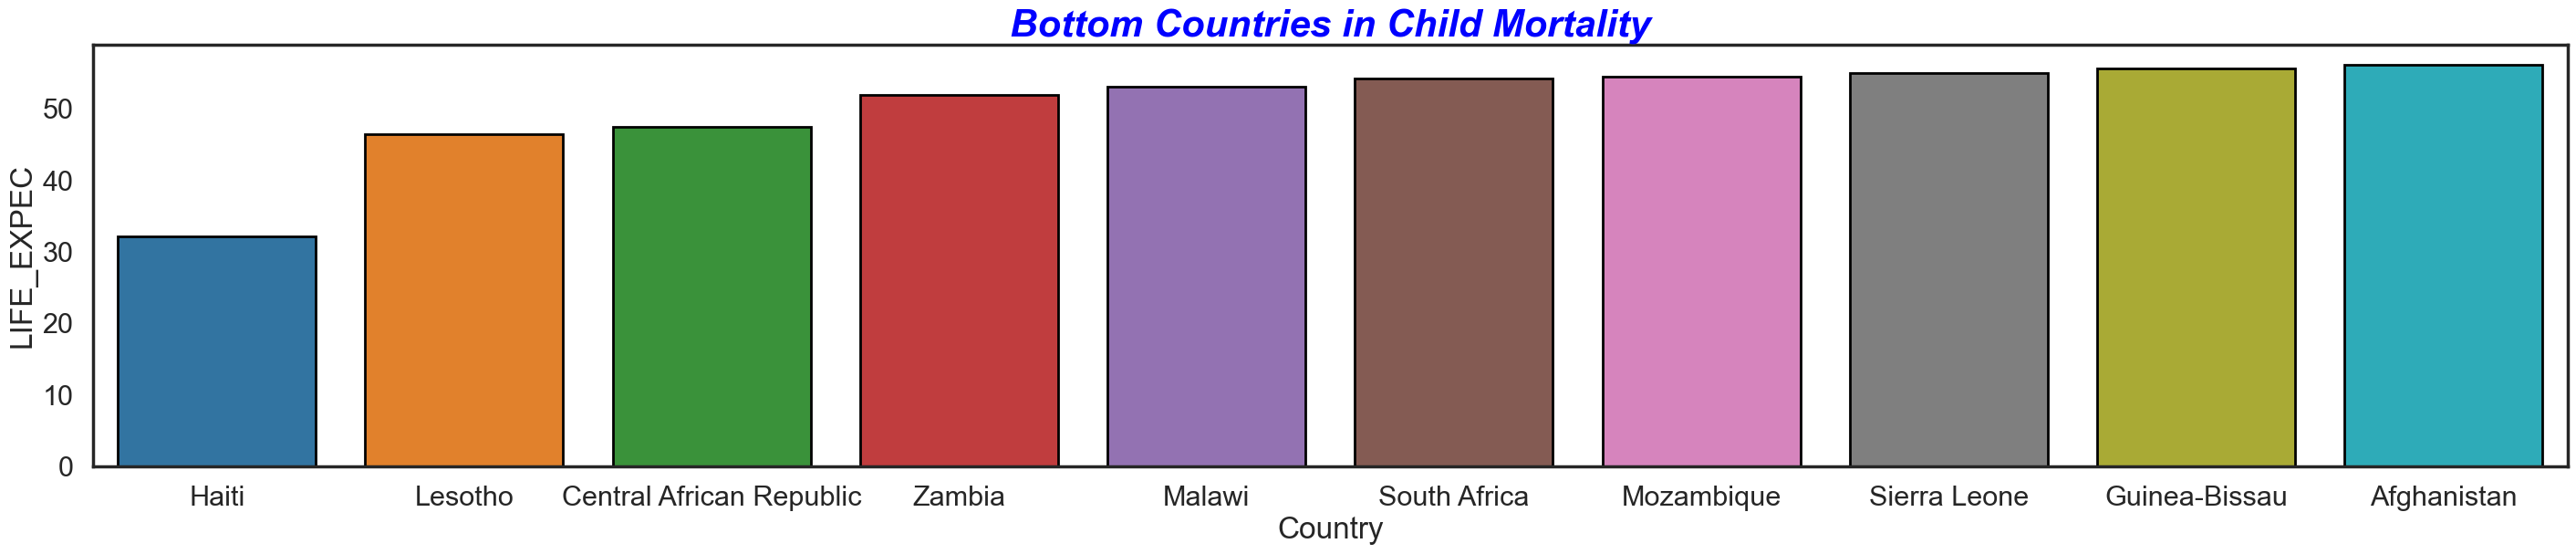

In [42]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='life_expec',data=life_b,edgecolor='black')
plt.title('Bottom Countries in Child Mortality',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('LIFE_EXPEC')

plt.show()

In [43]:
# top countries in total_fer
total_fer=df.sort_values('total_fer',ascending=False).head(10)
total_fer

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.50,71.1,6.23,3600
3,Angola,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530
155,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330


[Text(0, 0, 'Niger'),
 Text(1, 0, 'Chad'),
 Text(2, 0, 'Mali'),
 Text(3, 0, 'Congo, Dem. Rep.'),
 Text(4, 0, 'Burundi'),
 Text(5, 0, 'Timor-Leste'),
 Text(6, 0, 'Angola'),
 Text(7, 0, 'Uganda'),
 Text(8, 0, 'Burkina Faso'),
 Text(9, 0, 'Nigeria')]

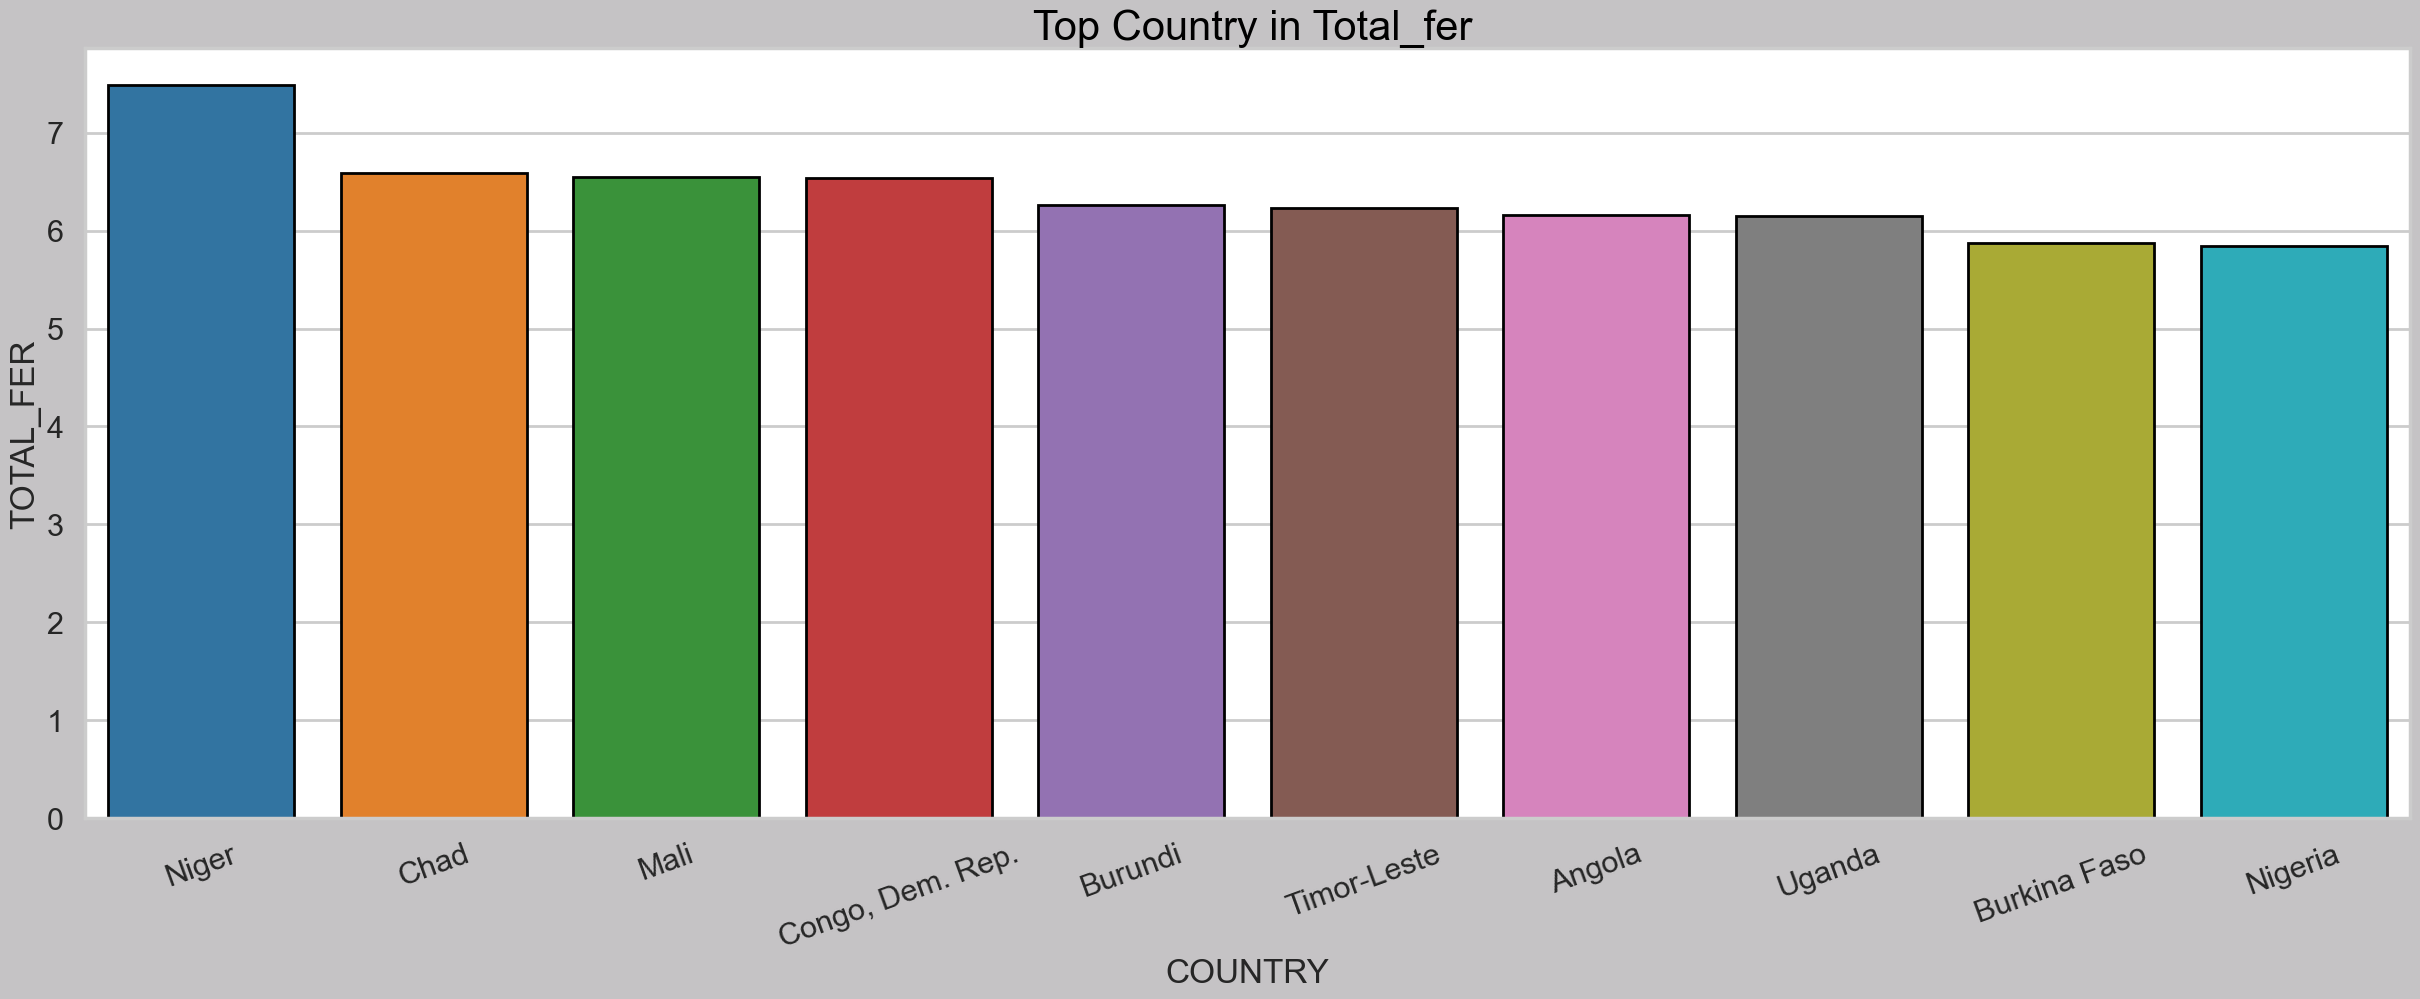

In [44]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='total_fer',data=total_fer,edgecolor='black')
plt.title(' Top Country in Total_fer',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("TOTAL_FER")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [45]:
# bottom wise total_fer in countries
totalfer_b=df.sort_values('total_fer',ascending=True).head(10)
totalfer_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500


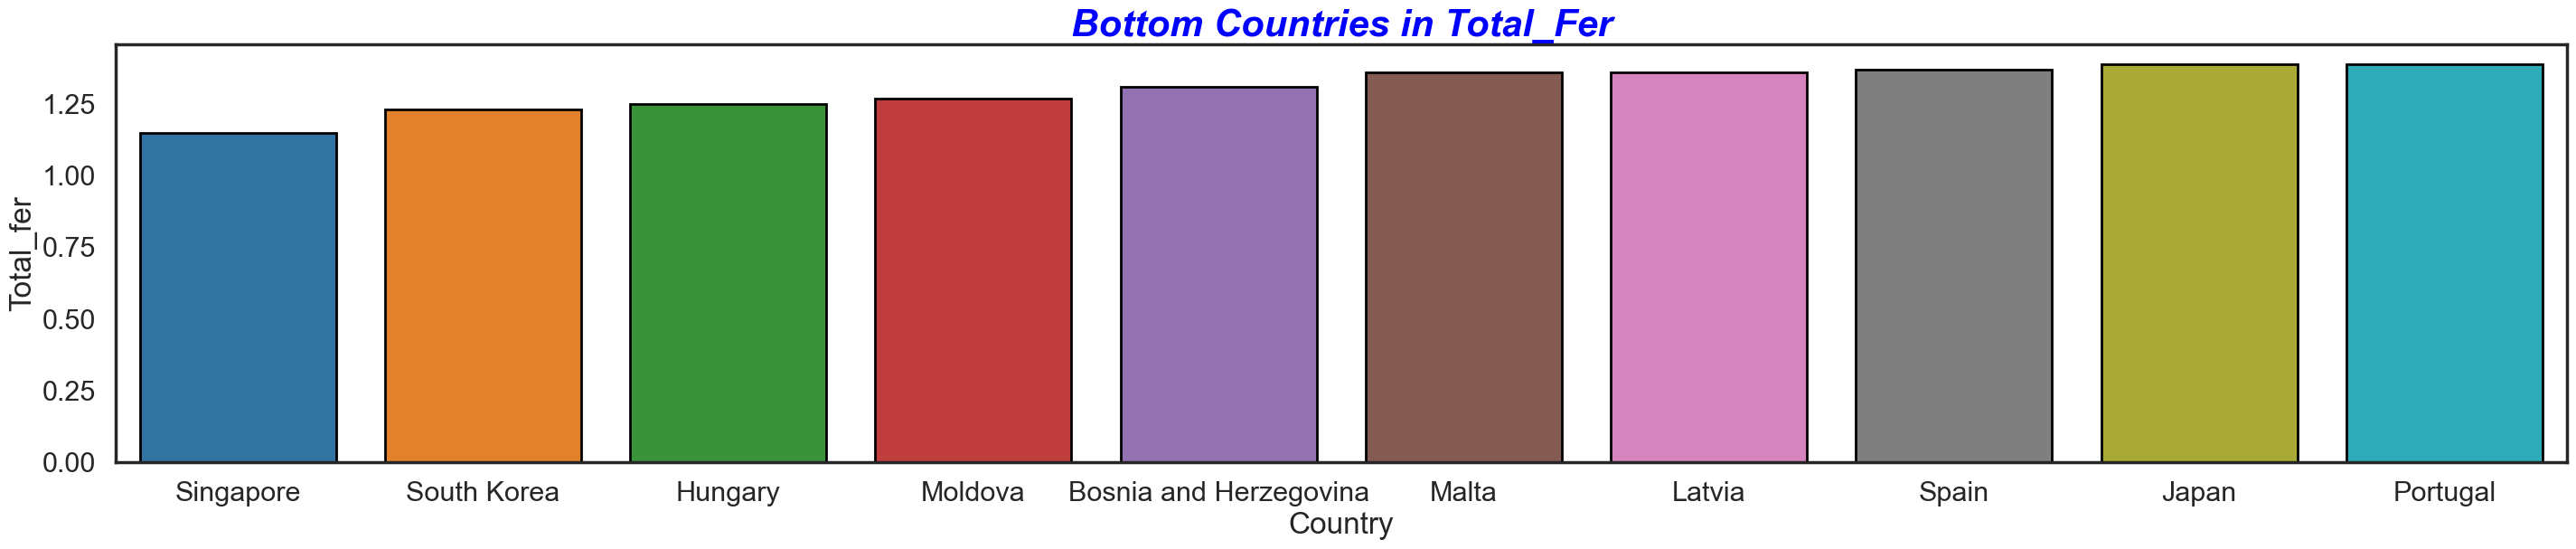

In [46]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='total_fer',data=totalfer_b,edgecolor='black')
plt.title('Bottom Countries in Total_Fer',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('Total_fer')

plt.show()

In [47]:
# top countries gdpp
gdpp=df.sort_values('gdpp',ascending=False).head(10)
gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


[Text(0, 0, 'Luxembourg'),
 Text(1, 0, 'Norway'),
 Text(2, 0, 'Switzerland'),
 Text(3, 0, 'Qatar'),
 Text(4, 0, 'Denmark'),
 Text(5, 0, 'Sweden'),
 Text(6, 0, 'Australia'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'Ireland'),
 Text(9, 0, 'United States')]

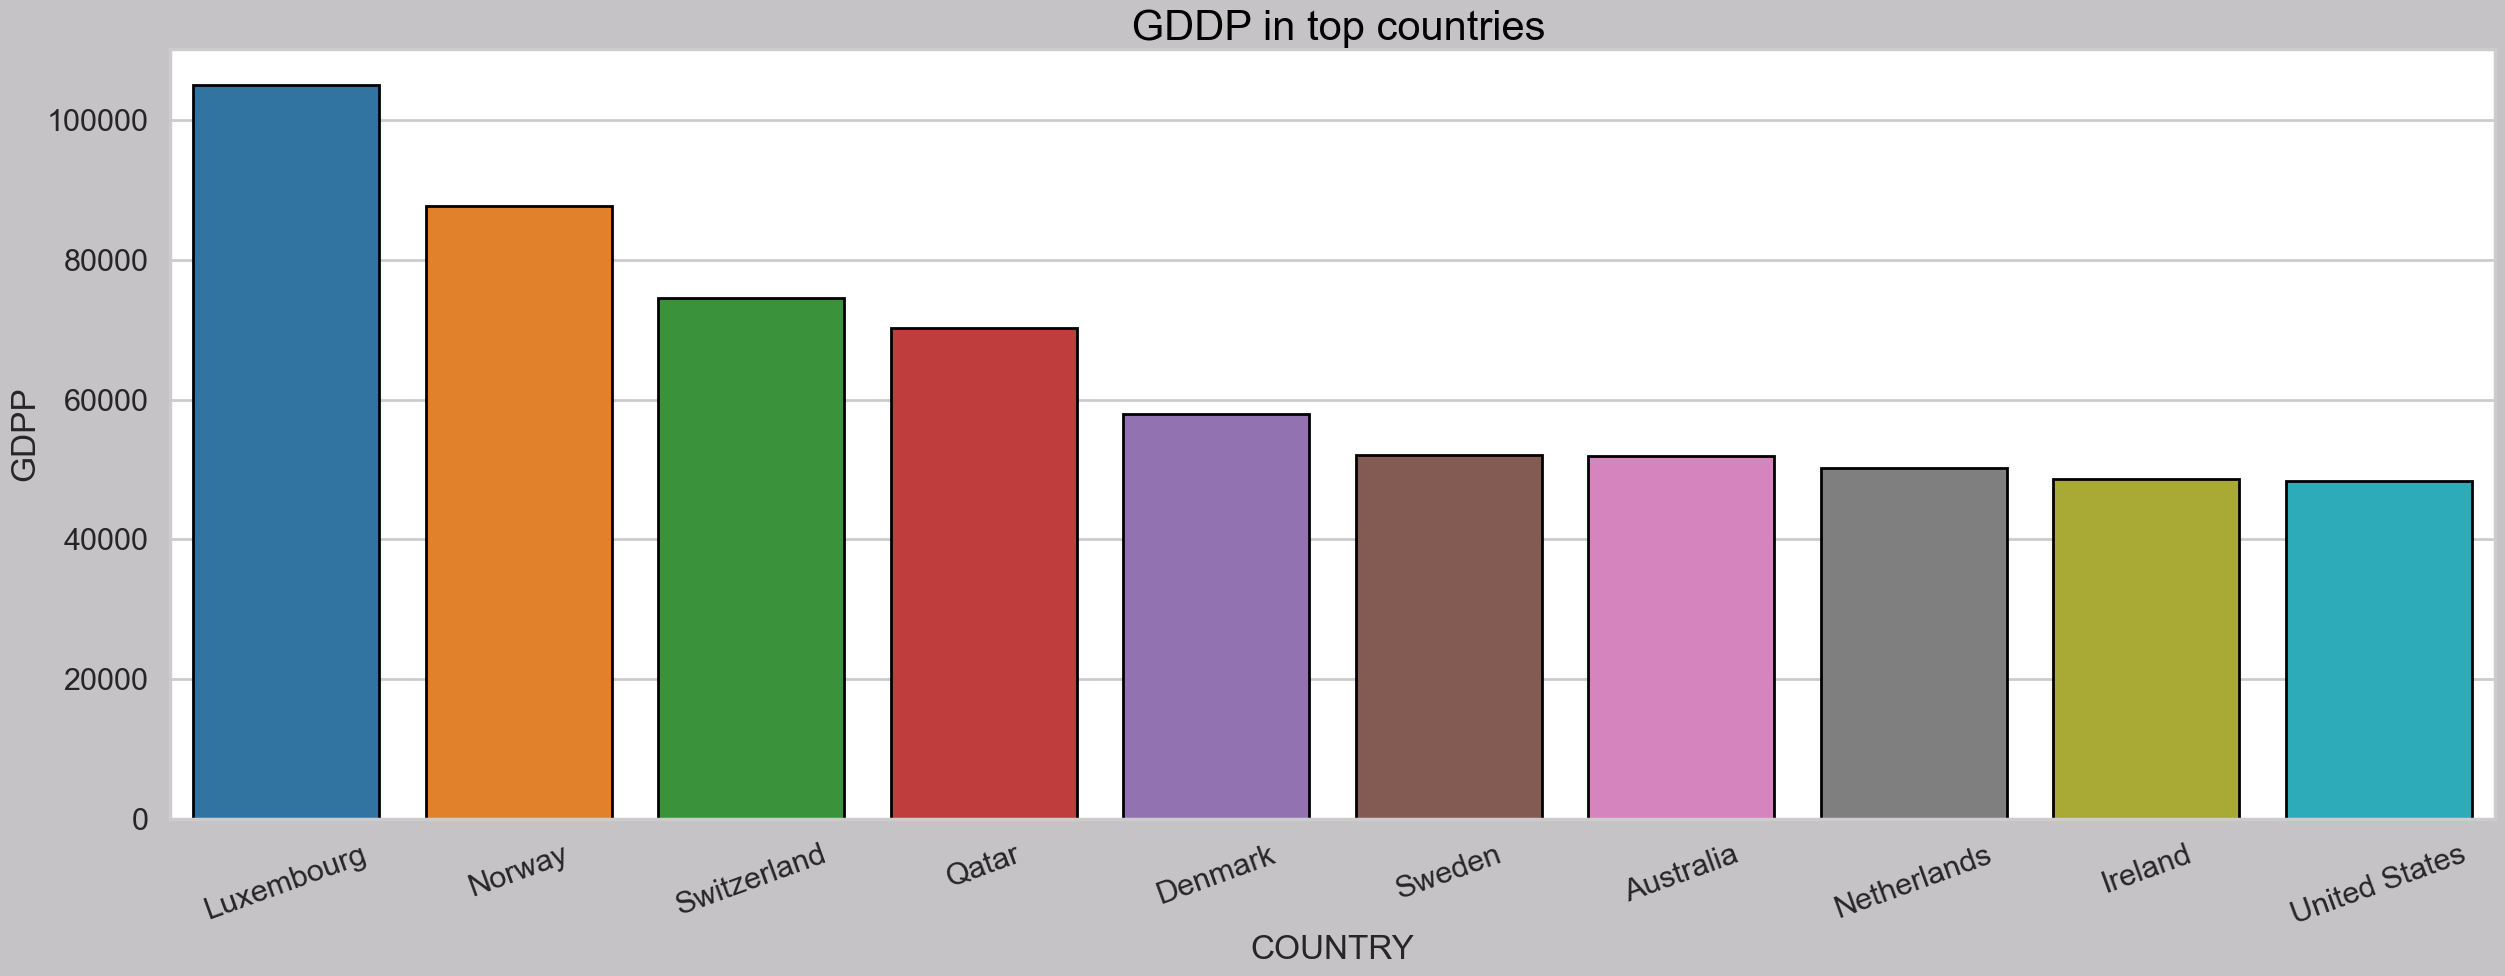

In [48]:
sns.set_style("whitegrid")
plt.subplots(figsize=(30,10),facecolor="#C5C3C5")
ab=sns.barplot(x='country',y='gdpp',data=gdpp,edgecolor='black')
plt.title(' GDDP in top countries',fontsize=30,color="black")
plt.xlabel("COUNTRY")
plt.ylabel("GDPP")
ab.set_xticklabels(ab.get_xticklabels(),rotation=20)

In [49]:
# bottom wise gdpp of countries
gdpp_b=df.sort_values('gdpp',ascending=True).head(10)
gdpp_b

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


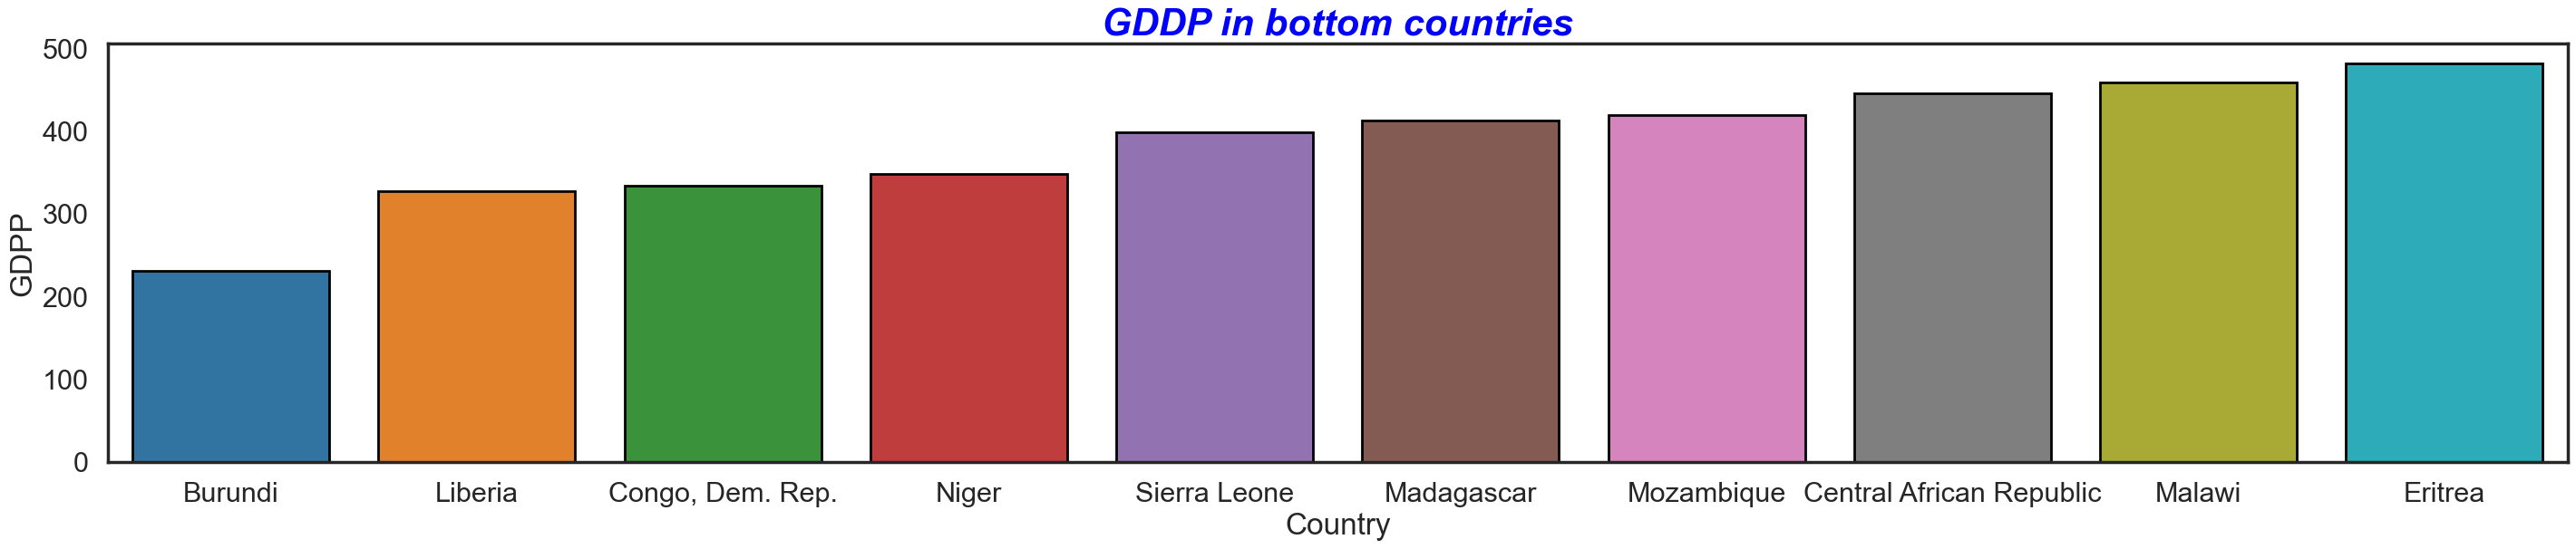

In [50]:
sns.set_style('white')
sns.set_context("poster",font_scale=1)
plt.figure(figsize=(35,6))
sns.barplot(x='country',y='gdpp',data=gdpp_b,edgecolor='black')
plt.title('GDDP in bottom countries',fontsize=30,fontweight='bold',fontstyle='oblique',color='blue')
plt.xlabel('Country')
plt.ylabel('GDPP')

plt.show()

In [51]:
df.drop("country",axis=1,inplace=True)

In [52]:
def box_plot(df):
    cols=df.columns
    
    
    fig,axes=plt.subplots(3,3,figsize=(15,7))
    axes=axes.flatten()
    for i,j in enumerate(cols):
        sns.boxplot(x=df[j],ax=axes[i])
        axes[i].set_title(f"{j}.skewess{df[j].skew().round(2)}")
        plt.tight_layout()

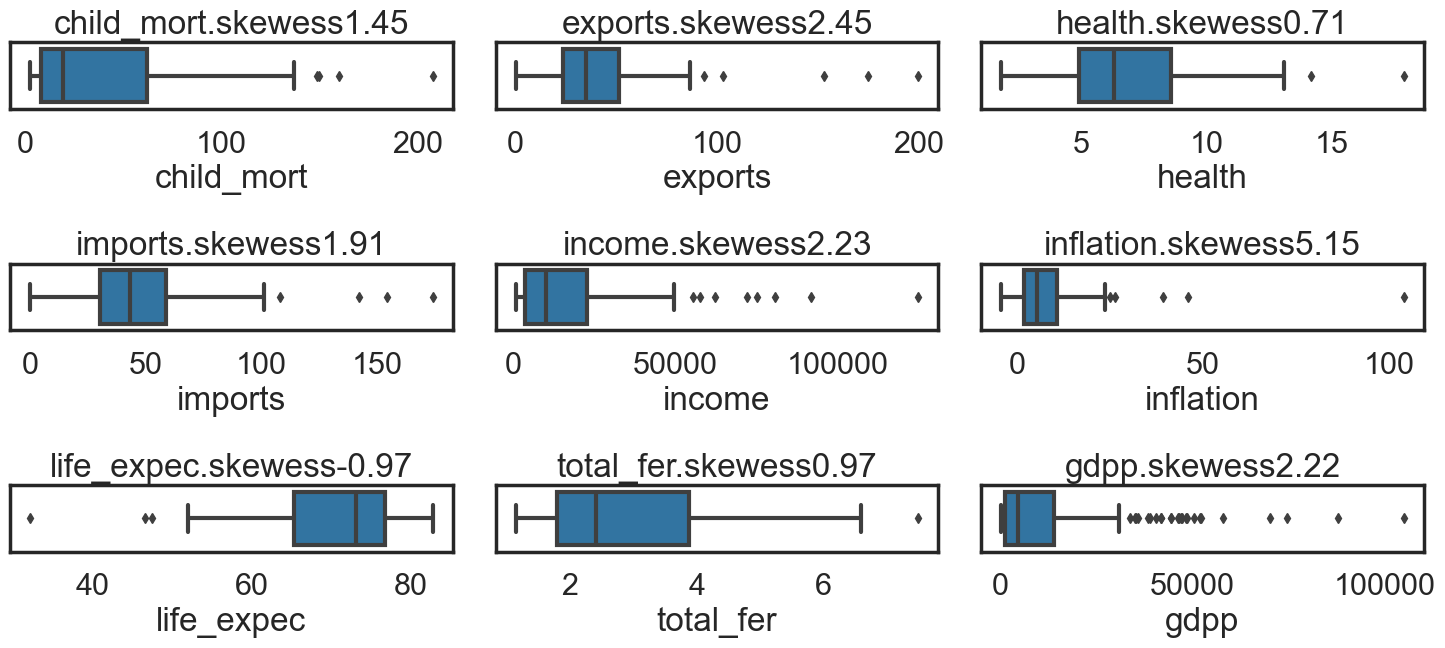

In [53]:
box_plot(df)

In [54]:
columns=df.columns

In [55]:
from sklearn.preprocessing  import StandardScaler

In [56]:
St=StandardScaler()

In [57]:
df=St.fit_transform(df)


In [58]:
scaled_column=pd.DataFrame(df,columns=columns)  

In [59]:
scaled_column

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [60]:
pca=PCA()

In [61]:
pca.fit(scaled_column)

PCA()

In [62]:

x_pca=pca.transform(scaled_column)

In [63]:
x_pca

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [64]:
no_of_components=pca.n_components_
print(no_of_components)

9


In [65]:
variance_explained=pca.explained_variance_
print(variance_explained)

[4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]


In [66]:
variance_explained.sum()

9.054216867469881

In [67]:
variance_explained_ratio=pca.explained_variance_ratio_
print(variance_explained_ratio)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [68]:
pca.singular_values_

array([26.28030915, 16.06984236, 13.9804868 , 12.88910478, 10.5034936 ,
        6.11048666,  4.35250145,  3.84039901,  3.34187463])

In [69]:
columns=list(scaled_column.columns)
df_pca=pd.DataFrame({'feature':columns,
                    "pc_0":pca.components_[0],
                    "pc_1":pca.components_[1],
                    "pc_2":pca.components_[2],
                    "pc_3":pca.components_[3],
                    "pc_4":pca.components_[4],
                    "pc_5":pca.components_[5],
                    "pc_6":pca.components_[6],
                    "pc_7":pca.components_[7],
                    "pc_8":pca.components_[8]})

In [70]:
hdf_pca

,feature,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646


In [71]:
component=np.cumsum(pca.explained_variance_ratio_)
component=np.argmax(component>=0.9)

In [72]:
new_pca=PCA(n_components=component)

In [73]:
pca_1=new_pca.fit_transform(scaled_column)

In [74]:
pca_df=pd.DataFrame(pca_1,columns=["PCA_1","PCA_2","PCA_3","PCA_4"])

In [75]:
#kmeans
inertia=[]
for i in range(1,15):
    Kmean=KMeans(n_clusters=i)
    Kmean.fit(pca_df)
    inertia.append(Kmean.inertia_)

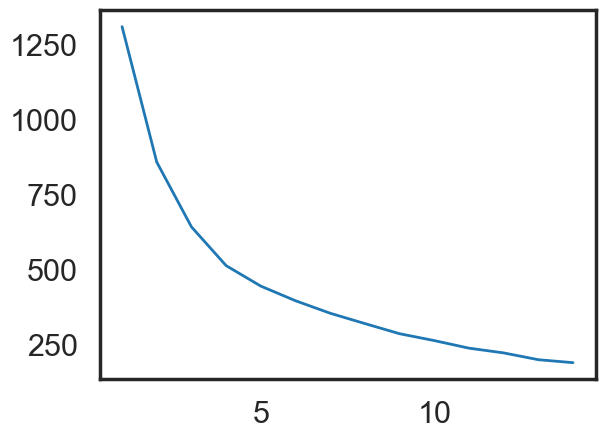

In [76]:
sns.lineplot(x=list(range(1,15)),y=inertia,linewidth=2)
plt.show()

In [77]:
from sklearn.metrics import silhouette_score

In [78]:
inertia=[]
scores=[]
for i in range(2,15):
    Kmean=KMeans(n_clusters=i)
    Kmean.fit(pca_df)
    inertia.append(Kmean.inertia_)
    score=silhouette_score(pca_df,Kmean.labels_)
    scores.append(score)

In [79]:
scores

[0.32244656378352504,
 0.3340859524580048,
 0.34900539172479056,
 0.2757133899215408,
 0.2932223005542841,
 0.28635353966059807,
 0.2703985576072908,
 0.2752437827520204,
 0.2573878740391444,
 0.2638351258456635,
 0.2688221053175462,
 0.27570210739994605,
 0.28368472521108923]

In [80]:
kmeans=KMeans(n_clusters=4)
y=kmeans.fit_predict(pca_df)
print(y)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 1 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [81]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [82]:
center=Kmean.cluster_centers_
center

array([[-1.93677738, -0.20489515,  0.0671346 ,  0.10800731],
       [ 2.3857818 , -1.5212627 , -0.33263866,  1.06535735],
       [-0.45472917, -0.91308663,  0.69033554, -0.79038327],
       [ 5.46022462,  5.43247334,  0.21164795,  0.90605761],
       [ 0.77608585, -0.48822573, -0.50717577, -0.69246383],
       [-3.14568966,  0.47689945, -0.48393305,  1.10825118],
       [ 1.38008063,  0.48219752,  1.66925224, -0.10495589],
       [-4.91206615, -0.09449868,  6.11015827,  2.4124214 ],
       [-0.17572296,  0.63567749, -0.23184294, -0.92344495],
       [-1.24077388,  0.91052789, -1.71676443,  0.57902137],
       [-1.71202324,  1.41141767,  1.48675191,  0.40454716],
       [ 1.56743419,  0.9691464 , -0.29785374, -0.79676127],
       [ 3.05601371, -0.03036662,  3.10532784,  1.29184525],
       [ 3.57002885,  0.51982041, -0.5422235 ,  1.48374858]])

In [83]:
kmean_df=pd.concat([pca_df,pd.DataFrame(np.array(y),columns=["Cluster"])],axis=1)
kmean_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,Cluster
0,-2.913025,0.095621,-0.718118,1.005255,1
1,0.429911,-0.588156,-0.333486,-1.161059,0
2,-0.285225,-0.455174,1.221505,-0.868115,0
3,-2.932423,1.695555,1.525044,0.839625,1
4,1.033576,0.136659,-0.225721,-0.847063,0


In [84]:
kmean_df["Cluster"].value_counts()

Cluster
0    86
1    48
2    30
3     3
Name: count, dtype: int64

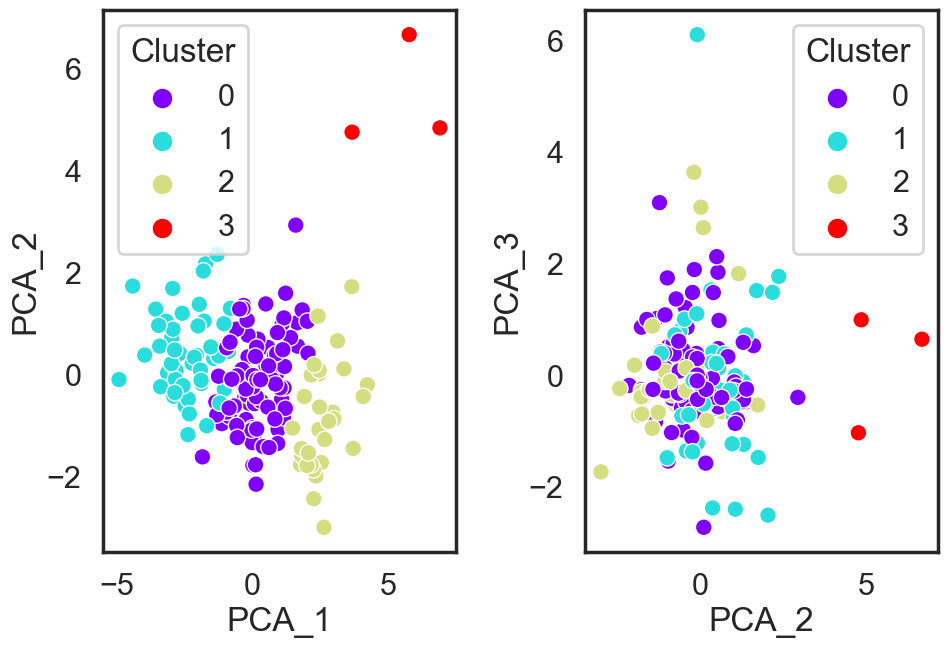

In [85]:
fig,axes=plt.subplots(1,2,figsize=(10,7))
sns.scatterplot(x="PCA_1",y="PCA_2",hue="Cluster",data=kmean_df,palette="rainbow",ax=axes[0])
sns.scatterplot(x="PCA_2",y="PCA_3",hue="Cluster",data=kmean_df,palette="rainbow",ax=axes[1])
plt.tight_layout()

In [86]:
kmean_df

,PCA_1,PCA_2,PCA_3,PCA_4,Cluster
0,-2.913025,0.095621,-0.718118,1.005255,1
1,0.429911,-0.588156,-0.333486,-1.161059,0
2,-0.285225,-0.455174,1.221505,-0.868115,0
3,-2.932423,1.695555,1.525044,0.839625,1
4,1.033576,0.136659,-0.225721,-0.847063,0
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,0
163,-0.551036,-1.233886,3.101350,-0.115311,0
164,0.498524,1.390744,-0.238526,-1.074098,0
165,-1.887451,-0.109453,1.109752,0.056257,1


In [88]:
x=kmean_df.drop("Cluster",axis=1)
y=kmean_df["Cluster"]

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True,stratify=y)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier(n_neighbors=4,metric="manhattan")

In [104]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [105]:
knn.score(x_train,y_train)

0.9398496240601504

In [106]:
knn.score(x_test,y_test)

0.9117647058823529

In [107]:
train_score=[]
test_score=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

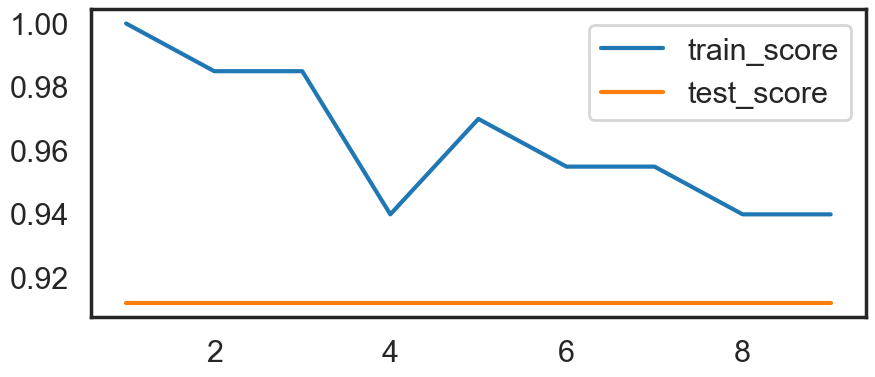

In [108]:
rg=list(range(1,10))
plt.figure(figsize=(10,4))
plt.plot(rg,train_score,label="train_score")
plt.plot(rg,test_score,label="test_score")
plt.legend()
plt.show()

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr=LogisticRegression()

In [111]:
lr.fit(x_train,y_train)

LogisticRegression()

In [112]:
lr.score(x_train,y_train)

0.9849624060150376

In [113]:
lr.score(x_test,y_test)

0.9705882352941176

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
tree=DecisionTreeClassifier()

In [116]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
tree.score(x_train,y_train)

1.0

In [118]:
tree.score(x_test,y_test)

0.9411764705882353

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc=RandomForestClassifier()

In [121]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
rfc.score(x_train,y_train)

1.0

In [123]:
rfc.score(x_test,y_test)

0.9411764705882353

In [126]:
#Prediction
predict=lr.predict(x_test)

In [127]:
predict

array([1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 3, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2])

In [128]:
result=pd.DataFrame(predict,columns=["Prediction"])

In [130]:
result["Actual_Data"]=np.array(y_test)

In [131]:
result

,Prediction,Actual_Data
0,1,1
1,1,1
2,0,0
3,2,2
4,0,0
5,0,0
6,1,1
7,0,0
8,2,2
9,0,0


In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [133]:
cnc=confusion_matrix(predict,y_test)

In [134]:
cnc

array([[16,  0,  0,  0],
       [ 1, 10,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0,  1]], dtype=int64)

In [135]:
acc=accuracy_score(predict,y_test)
acc

0.9705882352941176